# All oscillation analysis

Brief 1-2 sentence description of notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import collections
import itertools
from collections import defaultdict

In [3]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import mannwhitneyu

In [4]:
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import colorsys

In [5]:
from scipy.stats import linregress

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
from spectral_connectivity import Multitaper, Connectivity
import spectral_connectivity

In [8]:
FONTSIZE = 20

In [9]:
font = {'weight' : 'medium',
        'size'   : 20}

matplotlib.rc('font', **font)

## Inputs & Data

Explanation of each input and where it comes from.

In [10]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [11]:
CHANNEL_MAP_AND_ALL_TRIALS_DF = pd.read_pickle("./proc/full_baseline_and_trial_lfp_traces.pkl")
MERGED_TRIALS_AND_VIDEO = pd.read_pickle("./proc/trial_SLEAP_and_metadata.pkl")

In [12]:
OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

OUTCOME_TO_COLOR = {'lose': "#951a1d",
 'omission': "#af780d",
 'rewarded': "#0499af",
 'win': "#3853a3"}

In [13]:
OUTCOME_COMPARISONS = {"win_lose": ("win", "lose"), "lose_omission": ("lose", "omission"), "win_rewarded": ("win", "rewarded")}

In [14]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [15]:
TIME_HALFBANDWIDTH_PRODUCT = 2
TIME_WINDOW_DURATION = 1
TIME_WINDOW_STEP = 0.5
RESAMPLE_RATE=1000

In [16]:
BIN_TO_DISTANCE = {0: "0 to 5cm", 1: "5cm+"}

In [17]:
MIN_DISTANCE = 0
MAX_DISTANCE = 5

In [18]:
ALL_BANDS = ["theta", "beta", "gamma"]
BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "beta": {"low_freq": 20, "high_freq": 31}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6,11), "beta": (20,31), "gamma": (30,51)}

In [19]:
GROUPINGS = "trial_outcome"

In [20]:
FONTSIZE=20

In [21]:
MERGED_TRIALS_AND_VIDEO.head()

time                            recording_dir  \
0  30950500  20221214_125409_om_and_comp_6_1_and_6_3   
1  32550496  20221214_125409_om_and_comp_6_1_and_6_3   
2  34350494  20221214_125409_om_and_comp_6_1_and_6_3   
3  35950496  20221214_125409_om_and_comp_6_1_and_6_3   
4  37450494  20221214_125409_om_and_comp_6_1_and_6_3   

                                      recording_file  time_stamp_index  \
0  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          27998597   
1  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          29598593   
2  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          31398591   
3  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          32998593   
4  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          34498591   

                                          video_file  video_frame  \
0  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        28574   
1  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        30569   
2  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        32813   
3  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        34807   
4  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        36677   

   video_number             subject_info competition_closeness  \
0           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
1           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
2           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
3           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
4           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   

                                  video_name  ...  \
0  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
1  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
2  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
3  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
4  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   

  baseline_chunked_subject_thorax_to_reward_port_distance  \
0  [1.8743491243625925, 2.415746231971286, 2.6092...        
1  [2.1610617930145697, 2.0627717739665323, 2.173...        
2  [2.1603274833871233, 1.719418554880341, 2.1940...        
3  [2.3243582741087034, 2.474626570508647, 2.3588...        
4  [2.050847695216461, 1.924712860657735, 2.11332...        

  baseline_chunked_agent_thorax_to_reward_port_distance  \
0  [24.457512173893996, 24.105898379992308, 23.75...      
1  [18.18935897960483, 17.151614209578458, 17.965...      
2  [12.351510353548905, 14.7407606871931, 21.6241...      
3  [11.740353934769644, 11.77614243878705, 11.038...      
4  [26.624003217650046, 26.4440739455394, 26.7378...      

   baseline_chunked_subject_thorax_to_agent_distance  \
0  [24.979701762391695, 22.97606870054344, 21.618...   
1  [17.180542025000065, 15.67928472897514, 16.254...   
2  [10.481987827455116, 13.904524717531153, 20.77...   
3  [13.743103594851767, 13.8505713096129, 12.9344...   
4  [25.23454020309797, 25.108996390924958, 25.390...   

      trial_chunked_subject_thorax_to_agent_distance  \
0  [15.254204064734637, 10.725816239560091, 8.417...   
1  [16.075444063675132, 21.578669453644572, 25.00...   
2  [20.98692816276465, 20.91714274677675, 21.0041...   
3  [21.918034306433135, 22.177696873285814, 21.85...   
4  [24.85815579080418, 23.083947291084232, 19.909...   

  binned_trial_subject_thorax_to_reward_port_distance  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...    
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    

   binned_trial_agent_thorax_to_reward_port_distance  \
0  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

  binned_baseline_

In [22]:
CHANNEL_MAP_AND_ALL_TRIALS_DF.head()

time                                      recording_dir  \
0   6310663  20221202_134600_omission_and_competition_subje...   
1   7910662  20221202_134600_omission_and_competition_subje...   
2   9710660  20221202_134600_omission_and_competition_subje...   
3  11310658  20221202_134600_omission_and_competition_subje...   
4  12810657  20221202_134600_omission_and_competition_subje...   

                                      recording_file  time_stamp_index  \
0  20221202_134600_omission_and_competition_subje...           1390826   
1  20221202_134600_omission_and_competition_subje...           2990825   
2  20221202_134600_omission_and_competition_subje...           4790823   
3  20221202_134600_omission_and_competition_subje...           6390821   
4  20221202_134600_omission_and_competition_subje...           7890820   

                                          video_file  video_frame  \
0  20221202_134600_omission_and_competition_subje...         1734   
1  20221202_134600_omission_and_competition_subje...         3728   
2  20221202_134600_omission_and_competition_subje...         5972   
3  20221202_134600_omission_and_competition_subje...         7966   
4  20221202_134600_omission_and_competition_subje...         9836   

   video_number      subject_info competition_closeness  \
0           1.0  6_1_top_2_base_3              rewarded   
1           1.0  6_1_top_2_base_3              rewarded   
2           1.0  6_1_top_2_base_3              rewarded   
3           1.0  6_1_top_2_base_3              omission   
4           1.0  6_1_top_2_base_3              rewarded   

                                          video_name  ...  \
0  20221202_134600_omission_and_competition_subje...  ...   
1  20221202_134600_omission_and_competition_subje...  ...   
2  20221202_134600_omission_and_competition_subje...  ...   
3  20221202_134600_omission_and_competition_subje...  ...   
4  20221202_134600_omission_and_competition_subje...  ...   

                     vHPC_baselineandtrial_lfp_trace  \
0  [-0.07045184, -0.0958607, -0.054282565, 0.1512...   
1  [0.30606127, 0.22405995, 0.28873706, 0.4100066...   
2  [-1.2300198, -1.2323297, -1.3039365, -1.096045...   
3  [0.1605378, 0.4169363, 0.64561605, 0.6756447, ...   
4  [-0.30952612, 0.19056645, 0.4331056, 0.3638087...   

                              BLA_baseline_lfp_trace  \
0  [2.0367692, 2.1165679, 2.162167, 2.2685654, 2....   
1  [0.30589536, 0.13679792, -0.064599015, -0.3381...   
2  [-2.0025697, -1.9151709, -1.9436705, -1.552276...   
3  [-1.2729807, -1.0468841, -0.8378873, -0.754288...   
4  [-2.1469674, -2.0690687, -2.0937681, -2.152667...   

                                 BLA_trial_lfp_trace  \
0  [0.31159526, 0.35909453, 0.18239723, -0.509192...   
1  [0.020899683, -0.05129922, 0.113998264, -0.416...   
2  [0.6896895, 1.3983787, 1.7574733, 1.4287783, 1...   
3  [2.6789594, 2.3939636, 2.2096665, 1.97597, 1.8...   
4  [-0.18809713, 0.108298354, -0.66878986, -0.944...   

                      BLA_baselineandtrial_lfp_trace  \
0  [2.0367692, 2.1165679, 2.162167, 2.2685654, 2....   
1  [0.30589536, 0.13679792, -0.064599015, -0.3381...   
2  [-2.0025697, -1.9151709, -1.9436705, -1.552276...   
3  [-1.2729807, -1.0468841, -0.8378873, -0.754288...   
4  [-2.1469674, -2.0690687, -2.0937681, -2.152667...   

                               LH_baseline_lfp_trace  \
0  [3.0443187, 3.1354659, 3.1810396, 3.1901543, 3...   
1  [-1.1575702, -1.2699852, -1.3489795, -1.427973...   
2  [-0.20356221, -0.08203254, -0.18837102, -0.142...   
3  [-2.4792056, -2.1480372, -1.8259835, -1.677109...   
4  [-2.1176548, -1.4522797, -1.0360405, -1.108958...   

                                  LH_trial_lfp_trace  \
0  [0.78082824, 1.1788379, 0.8415931, -0.40104795...   
1  [0.91754913, 0.4466216, 0.64410734, 0.03342066...   
2  [-0.58941895, 0.25521234, 0.66233677, 0.416239...   
3  [2.7587237, 2.233108, 1.4796239, 0.93274033, 1...   
4  [0.5104247, 1.4613944, 0.5468836, -0.036458906...   

      

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

In [23]:
def generate_pairs(lst):
    pairs = []
    n = len(lst)
    for i in range(n):
        for j in range(i+1, n):
            pairs.append((lst[i], lst[j]))
    return pairs

In [24]:
def nested_dict():
    return defaultdict(dict)

In [25]:
def mean_of_counter(counter):
    # Extract values from the Counter and calculate the mean
    values = list(counter.values())
    return sum(values) / len(values) if values else 0  # Prevent division by zero

In [26]:
def adjust_lightness(color, amount=0.5):
    """
    Adjusts the lightness of the given color by the provided amount.
    :param color: Input color in some format that matplotlib's `to_rgb` can handle.
    :param amount: Amount to adjust. > 1 for lighter, < 1 for darker.
    :return: Adjusted color.
    """
    import colorsys
    c = mcolors.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(*c)
    return colorsys.hls_to_rgb(h, max(0, min(1, amount * l)), s)

In [27]:
def generate_gradient_colors(base_color, num_colors=10):
    """
    Generate gradient colors based on a base color.
    
    :param base_color: The base color to create a gradient from.
    :param num_colors: The number of gradient colors to generate.
    :return: List of colors.
    """
    # Convert base color to HLS (Hue, Lightness, Saturation)
    h, l, s = colorsys.rgb_to_hls(*mcolors.to_rgb(base_color))

    # Determine the step size for lightness
    middle_index = num_colors // 2
    lightness_step = l / (middle_index if middle_index > 0 else 1)

    colors = []
    for i in range(num_colors):
        if i < middle_index:
            # For the lighter colors (before the middle)
            new_lightness = l + (middle_index - i) * lightness_step
        elif i == middle_index:
            # The middle color remains the base color
            new_lightness = l
        else:
            # For the darker colors (after the middle)
            new_lightness = l - (i - middle_index) * lightness_step

        # Ensure new lightness is within the valid range [0, 1]
        new_lightness = max(0, min(new_lightness, 1))

        new_color = colorsys.hls_to_rgb(h, new_lightness, s)
        colors.append(new_color)

    return colors

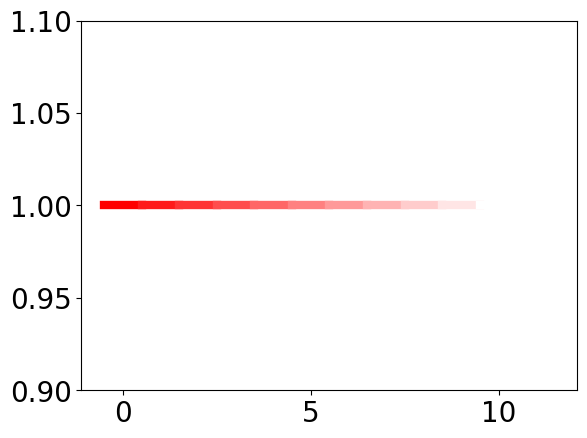

In [28]:
# Original color
original_color = 'red'  # Can be any color matplotlib understands

# Generate lighter versions
lighter_colors = [adjust_lightness(original_color, amount=1+(0.1*i)) for i in range(12)]

# Plotting to demonstrate the colors
for i, color in enumerate(lighter_colors):
    plt.plot([i-0.5, i+0.5], [1, 1], color=color, linewidth=6)  

plt.ylim(0.9, 1.1)
plt.show()

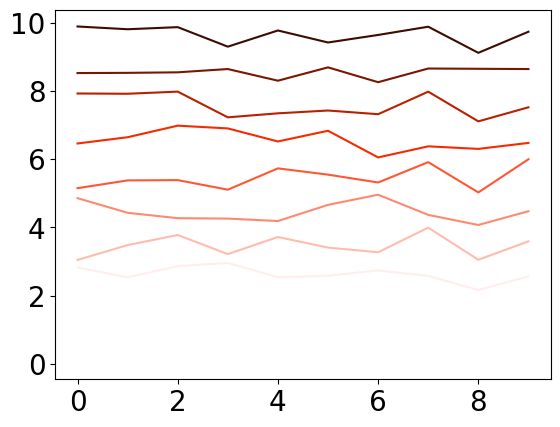

In [29]:
# Base color
base_color = '#ff5733'  # Reddish color

# Number of colors you want in the gradient
num_colors = 10

# Generate gradient colors
gradient_colors = generate_gradient_colors(base_color, num_colors)

# Set the color cycle to use the gradient colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=gradient_colors)

# Test by plotting some data
for i in range(num_colors):
    plt.plot(np.arange(10), np.random.rand(10) + i)

plt.show()

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [30]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [31]:
CHANNEL_MAP_AND_ALL_TRIALS_DF.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'mPFC_baselineandtrial_lfp_trace', 'vHPC_baseline_lfp_trace',
       'vHPC_trial_lfp_trace', 'vHPC_baselineandtrial_lfp_trace',
       'BLA_baseline_lfp_trace', 'BLA_trial_lfp_trace',
       'BLA_baselineandtrial_lfp_trace', 'LH_baseline_lfp_trace',
       'LH_trial_lfp_trace', 'LH_baselineandtrial_lfp_trace',
       'MD

In [32]:
MERGED_TRIALS_AND_VIDEO.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'file_path', 'start_frame', 'stop_frame', 'individual_subj', 'all_subj',
       'recording_name', 'track_names', 'subject_and_tracks_list',
       'subject_id', 'agent_id', 'corner_path', 'corner_parts', 'bottom_width',
       'top_width', 'right_height', 'left_height', 'average_height',
       'average_width', 'width_ratio', 'height_ratio', 'box_bottom_left',
       'reward_po

### Merging LFP Trace dataframe and SLEAP pose tracking

In [33]:
merge_columns = ["time", "recording_file", "current_subject", "video_number"]
# Find columns in df2 that are not in merge_columns and also exist in df1, then drop them from df2
cols_to_drop = [col for col in CHANNEL_MAP_AND_ALL_TRIALS_DF.columns if col not in merge_columns and col in MERGED_TRIALS_AND_VIDEO.columns]
CHANNEL_MAP_AND_ALL_TRIALS_DF = CHANNEL_MAP_AND_ALL_TRIALS_DF.drop(columns=cols_to_drop)

In [34]:
MERGED_LFP_AND_SLEAP = pd.merge(left=CHANNEL_MAP_AND_ALL_TRIALS_DF, right=MERGED_TRIALS_AND_VIDEO, on=merge_columns, how="right")

In [35]:
MERGED_LFP_AND_SLEAP.head()

time                                     recording_file  video_number  \
0  30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
1  32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
2  34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
3  35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
4  37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   

  current_subject                            mPFC_baseline_lfp_trace  \
0             6.1  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1             6.1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2             6.1  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3             6.1  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4             6.1  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                                mPFC_trial_lfp_trace  \
0  [0.50154364, 0.29617018, 0.22050627, 0.1145767...   
1  [0.31995025, 0.16429879, 0.010809131, 0.067016...   
2  [-0.13835686, 0.42804158, 0.5945022, 0.3134648...   
3  [-0.32211208, 0.023780087, 0.13835686, -0.1102...   
4  [-2.9508927, -2.998453, -2.3282866, -2.0104983...   

                     mPFC_baselineandtrial_lfp_trace  \
0  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                             vHPC_baseline_lfp_trace  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...   

                                vHPC_trial_lfp_trace  \
0  [-1.1479185, -1.1806493, -1.1432426, -1.139735...   
1  [-1.0205019, -0.9152954, -0.9947847, -0.976081...   
2  [0.47109076, 0.34016728, 0.18352668, 0.174175,...   
3  [0.15780956, 0.047927346, -0.14728892, -0.3565...   
4  [-4.0457697, -4.2304654, -3.9113393, -3.448431...   

                     vHPC_baselineandtrial_lfp_trace  ...  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...  ...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...  ...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...  ...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...  ...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...  ...   

  baseline_chunked_subject_thorax_to_reward_port_distance  \
0  [1.8743491243625925, 2.415746231971286, 2.6092...        
1  [2.1610617930145697, 2.0627717739665323, 2.173...        
2  [2.1603274833871233, 1.719418554880341, 2.1940...        
3  [2.3243582741087034, 2.474626570508647, 2.3588...        
4  [2.050847695216461, 1.924712860657735, 2.11332...        

  baseline_chunked_agent_thorax_to_reward_port_distance  \
0  [24.457512173893996, 24.105898379992308, 23.75...      
1  [18.18935897960483, 17.151614209578458, 17.965...      
2  [12.351510353548905, 14.7407606871931, 21.6241...      
3  [11.740353934769644, 11.77614243878705, 11.038...      
4  [26.624003217650046, 26.4440739455394, 26.7378...      

   baseline_chunked_subject_thorax_to_agent_distance  \
0  [24.979701762391695, 22.97606870054344, 21.618...   
1  [17.180542025000065, 15.67928472897514, 16.254...   
2  [10.481987827455116, 13.904524717531153, 20.77...   
3  [13.743103594851767, 13.8505713096129, 12.9344...   
4  [25.23454020309797, 25.108996390924958, 25.390...   

      trial_chunked_subject_thorax_to_agent_distance  \
0  [15.254204064734637, 10.725816239560091, 8.417...   
1  [16.075444063675132, 21.578669453644572, 25.00...   
2  [20.98692816276465, 20.91714274677675, 21.0041...   
3  [21.918034306433135, 22.177696873285814, 21.85...   
4  [24.85815579080418, 23.0839472910842

In [36]:
trace_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trace" in col]

In [37]:
trial_trace_columns = sorted([col for col in MERGED_LFP_AND_SLEAP.columns if "trial_lfp_trace" in col])
baseline_trace_columns = sorted([col for col in MERGED_LFP_AND_SLEAP.columns if "baseline_lfp_trace" in col])

In [38]:
trial_trace_columns

['BLA_baselineandtrial_lfp_trace',
 'BLA_trial_lfp_trace',
 'LH_baselineandtrial_lfp_trace',
 'LH_trial_lfp_trace',
 'MD_baselineandtrial_lfp_trace',
 'MD_trial_lfp_trace',
 'mPFC_baselineandtrial_lfp_trace',
 'mPFC_trial_lfp_trace',
 'vHPC_baselineandtrial_lfp_trace',
 'vHPC_trial_lfp_trace']

## Power Calcuation

- Calcuating the power at each frequency band

In [39]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_lfp_trace".format(region_and_baseline_or_trial)].apply(lambda x: Multitaper(time_series=x, sampling_frequency=RESAMPLE_RATE, time_halfbandwidth_product=TIME_HALFBANDWIDTH_PRODUCT,                                                                              time_window_duration=TIME_WINDOW_DURATION, time_window_step=TIME_WINDOW_STEP                                                                                                                                         ))

In [40]:
for col in trace_columns:
    print(col)
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)].apply(lambda x: Connectivity.from_multitaper(x))

mPFC_baseline_lfp_trace
mPFC_trial_lfp_trace
mPFC_baselineandtrial_lfp_trace
vHPC_baseline_lfp_trace
vHPC_trial_lfp_trace
vHPC_baselineandtrial_lfp_trace
BLA_baseline_lfp_trace
BLA_trial_lfp_trace
BLA_baselineandtrial_lfp_trace
LH_baseline_lfp_trace
LH_trial_lfp_trace
LH_baselineandtrial_lfp_trace
MD_baseline_lfp_trace
MD_trial_lfp_trace
MD_baselineandtrial_lfp_trace


In [41]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_frequencies".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.frequencies)

In [42]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.power().squeeze())

In [43]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "multitaper" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "connectivity" in col], errors="ignore")

In [44]:
MERGED_LFP_AND_SLEAP.head()

time                                     recording_file  video_number  \
0  30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
1  32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
2  34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
3  35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
4  37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   

  current_subject                            mPFC_baseline_lfp_trace  \
0             6.1  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1             6.1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2             6.1  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3             6.1  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4             6.1  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                                mPFC_trial_lfp_trace  \
0  [0.50154364, 0.29617018, 0.22050627, 0.1145767...   
1  [0.31995025, 0.16429879, 0.010809131, 0.067016...   
2  [-0.13835686, 0.42804158, 0.5945022, 0.3134648...   
3  [-0.32211208, 0.023780087, 0.13835686, -0.1102...   
4  [-2.9508927, -2.998453, -2.3282866, -2.0104983...   

                     mPFC_baselineandtrial_lfp_trace  \
0  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                             vHPC_baseline_lfp_trace  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...   

                                vHPC_trial_lfp_trace  \
0  [-1.1479185, -1.1806493, -1.1432426, -1.139735...   
1  [-1.0205019, -0.9152954, -0.9947847, -0.976081...   
2  [0.47109076, 0.34016728, 0.18352668, 0.174175,...   
3  [0.15780956, 0.047927346, -0.14728892, -0.3565...   
4  [-4.0457697, -4.2304654, -3.9113393, -3.448431...   

                     vHPC_baselineandtrial_lfp_trace  ...  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...  ...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...  ...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...  ...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...  ...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...  ...   

              vHPC_baselineandtrial_all_window_power  \
0  [[0.004081799382393642, 0.004478409633299712, ...   
1  [[0.0020464624396444257, 0.012982911734528337,...   
2  [[0.0015783582521282941, 0.005567936919386377,...   
3  [[0.02274953261551387, 0.015621690593521422, 0...   
4  [[0.012123153658059329, 0.007831128686847379, ...   

                       BLA_baseline_all_window_power  \
0  [[0.005199507213747652, 0.009777106914336028, ...   
1  [[0.008150183877759547, 0.008900235518903352, ...   
2  [[0.005229938321751643, 0.003790561589657125, ...   
3  [[0.011062291328325844, 0.011752258763066143, ...   
4  [[0.08032046268879472, 0.06055501644789241, 0....   

                          BLA_trial_all_window_power  \
0  [[0.001911122321714121, 0.0034651567784916245,...   
1  [[0.011027247597097058, 0.0242284710056087, 0....   
2  [[0.039170543466089044, 0.02999668822463571, 0...   
3  [[0.007854635910203446, 0.009764101358900396, ...   
4  [[0.05877811957864152, 0.039523099720926325, 0...   

               BLA_baselineandtrial_all_window_power  \
0  [[0.005199507213747652, 0.009777106914336028, ...   
1  [[0.008150183877759547, 0.008900235518903352, ...   
2  [[0.005229938321751643, 0.003790561589657125, ...   
3  [[0.011062291328325844, 0.011752258763066143, ...   
4  [[0.08032046268879472, 0.06055501644789241, 0....   

                        LH_bas

In [45]:
MERGED_LFP_AND_SLEAP.columns

Index(['time', 'recording_file', 'video_number', 'current_subject',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'mPFC_baselineandtrial_lfp_trace', 'vHPC_baseline_lfp_trace',
       'vHPC_trial_lfp_trace', 'vHPC_baselineandtrial_lfp_trace',
       ...
       'vHPC_baselineandtrial_all_window_power',
       'BLA_baseline_all_window_power', 'BLA_trial_all_window_power',
       'BLA_baselineandtrial_all_window_power', 'LH_baseline_all_window_power',
       'LH_trial_all_window_power', 'LH_baselineandtrial_all_window_power',
       'MD_baseline_all_window_power', 'MD_trial_all_window_power',
       'MD_baselineandtrial_all_window_power'],
      dtype='object', length=137)

### Averaging the power for all the windows(without any distance parsing) 

In [46]:
baseline_windowed_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "baseline_all_window_power" in col and "baselineandtrial_all_window_power" not in col]
trial_windowed_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trial_all_window_power" in col and "baselineandtrial_all_window_power" not in col]

In [47]:
trial_windowed_power_columns

['mPFC_trial_all_window_power',
 'vHPC_trial_all_window_power',
 'BLA_trial_all_window_power',
 'LH_trial_all_window_power',
 'MD_trial_all_window_power']

In [48]:
for col in baseline_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array(x[col]).mean(axis=0), axis=1)

In [49]:
for col in trial_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array(x[col]).mean(axis=0), axis=1)

In [50]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "multitaper" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "connectivity" in col], errors="ignore")

In [51]:
MERGED_LFP_AND_SLEAP.drop(columns=trace_columns, errors="ignore").to_pickle("./proc/rce_lfp_all_window_power.pkl")


# Averaging across bands within a window

In [52]:
ALL_REGION_BAND_COL = []
for col in trial_windowed_power_columns:
    for band, (min_freq, max_freq) in BAND_TO_FREQ.items():
        # print(min_freq)
        # print(max_freq)
        region_and_baseline_or_trial = "_".join(col.split("_")[:2])
        # print(region_and_baseline_or_trial)
        region_band_col = "{}_{}_all_window_power".format(region_and_baseline_or_trial, band)
        ALL_REGION_BAND_COL.append(region_band_col)
        MERGED_LFP_AND_SLEAP[region_band_col] = MERGED_LFP_AND_SLEAP[col].apply(lambda x: np.mean(x[:, min_freq:max_freq], axis=1))




In [53]:
MERGED_LFP_AND_SLEAP["BLA_trial_beta_all_window_power"].iloc[0].shape

(19,)

# Plotting the correlations

In [54]:
MERGED_LFP_AND_SLEAP["trial_chunked_agent_thorax_to_reward_port_distance"].iloc[0].shape

(19,)

In [55]:
MERGED_LFP_AND_SLEAP["BLA_trial_all_window_power"].iloc[0].shape

(19, 500)

In [56]:
ALL_REGION_BAND_COL

['mPFC_trial_theta_all_window_power',
 'mPFC_trial_beta_all_window_power',
 'mPFC_trial_gamma_all_window_power',
 'vHPC_trial_theta_all_window_power',
 'vHPC_trial_beta_all_window_power',
 'vHPC_trial_gamma_all_window_power',
 'BLA_trial_theta_all_window_power',
 'BLA_trial_beta_all_window_power',
 'BLA_trial_gamma_all_window_power',
 'LH_trial_theta_all_window_power',
 'LH_trial_beta_all_window_power',
 'LH_trial_gamma_all_window_power',
 'MD_trial_theta_all_window_power',
 'MD_trial_beta_all_window_power',
 'MD_trial_gamma_all_window_power']

In [57]:
MERGED_LFP_AND_SLEAP

time                                     recording_file  \
0    30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
1    32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
2    34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
3    35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
4    37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
..        ...                                                ...   
273  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
274  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
275  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
276  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
277  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

     video_number current_subject  \
0             1.0             6.1   
1             1.0             6.1   
2             1.0             6.1   
3             1.0             6.1   
4             1.0             6.1   
..            ...             ...   
273           1.0             1.4   
274           1.0             1.4   
275           1.0             1.4   
276           1.0             1.4   
277           1.0             1.4   

                               mPFC_baseline_lfp_trace  \
0    [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1    [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2    [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3    [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4    [-3.6210587, -2.9530544, -2.4342163, -2.574735...   
..                                                 ...   
273  [0.25026315, -0.0152599495, 0.03967587, 0.0122...   
274  [0.42422658, 0.38760272, 0.28383505, 0.0427278...   
275  [0.64702183, 0.027467908, -0.6317619, -1.02852...   
276  [-2.685751, -3.0641978, -4.092718, -4.0042105,...   
277  [-0.64091784, -0.17091143, 0.42727858, 0.37539...   

                                  mPFC_trial_lfp_trace  \
0    [0.50154364, 0.29617018, 0.22050627, 0.1145767...   
1    [0.31995025, 0.16429879, 0.010809131, 0.067016...   
2    [-0.13835686, 0.42804158, 0.5945022, 0.3134648...   
3    [-0.32211208, 0.023780087, 0.13835686, -0.1102...   
4    [-2.9508927, -2.998453, -2.3282866, -2.0104983...   
..                                                 ...   
273  [-2.2889924, -2.2004848, -1.4741111, -1.010208...   
274  [-2.426332, -2.2187965, -1.6297625, -1.0193646...   
275  [-1.815934, -1.4191753, -1.1017684, -0.4028626...   
276  [0.042727858, 0.22279526, 0.2655231, -0.326562...   
277  [-0.054935817, 0.5096823, 0.9369609, 1.0346246...   

                       mPFC_baselineandtrial_lfp_trace  \
0    [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1    [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2    [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3    [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4    [-3.6210587, -2.9530544, -2.4342163, -2.574735...   
..                                                 ...   
273  [0.25026315, -0.0152599495, 0.03967587, 0.0122...   
274  [0.42422658, 0.38760272, 0.28383505, 0.0427278...   
275  [0.64702183, 0.027467908, -0.6317619, -1.02852...   
276  [-2.685751, -3.0641978, -4.092718, -4.0042105,...   
277  [-0.64091784, -0.17091143, 0.42727858, 0.37539...   

                               vHPC_baseline_lfp_trace  \
0    [0.2583401, -0.26769176, -0.8311303, -1.046219...   
1    [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...   
2    [-1.0017985, -0.70955855, -0.7002069, -0.68033...   
3    [0.58447987, 0.4675839, 0.21275067, 0.03389983...   
4    [-1.4191171, -1.3793725, -1.1233703, -0.911788...   
..                                                 ...   
273  [-0.54008055, -0.7600229, -0.74047244, -0.6133...   
274  [-0.82844937, -0.7673543, -0.7062592, -0.71359...   
275  [-0.4374408, -0.3470201, -0.22971752, -0.22238...   
276  [0.75024766, 0.7820171, 0.73802865, 1.0141784,...   
277  [0.4276656, 0

In [58]:
MERGED_LFP_AND_SLEAP.columns

Index(['time', 'recording_file', 'video_number', 'current_subject',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'mPFC_baselineandtrial_lfp_trace', 'vHPC_baseline_lfp_trace',
       'vHPC_trial_lfp_trace', 'vHPC_baselineandtrial_lfp_trace',
       ...
       'vHPC_trial_gamma_all_window_power', 'BLA_trial_theta_all_window_power',
       'BLA_trial_beta_all_window_power', 'BLA_trial_gamma_all_window_power',
       'LH_trial_theta_all_window_power', 'LH_trial_beta_all_window_power',
       'LH_trial_gamma_all_window_power', 'MD_trial_theta_all_window_power',
       'MD_trial_beta_all_window_power', 'MD_trial_gamma_all_window_power'],
      dtype='object', length=162)

In [59]:
MERGED_LFP_AND_SLEAP["trial_chunked_subject_thorax_to_agent_distance"].iloc[0]


array([15.25420406, 10.72581624,  8.4172387 ,  8.7231517 ,  8.59957116,
        8.07624194,  8.59375454,  8.37916427,  7.61127276,  8.25624502,
        9.55952257,  9.14977448,  8.87671691,  9.85758634,  9.19390415,
        5.76098682,  7.2374539 , 10.61407246, 10.16667369])

In [60]:
MERGED_LFP_AND_SLEAP["current_subject"].unique()

array(['6.1', '1.1', '1.2', '1.4'], dtype=object)

In [61]:
subject_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["current_subject"] == "1.2"]

In [62]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return s<m

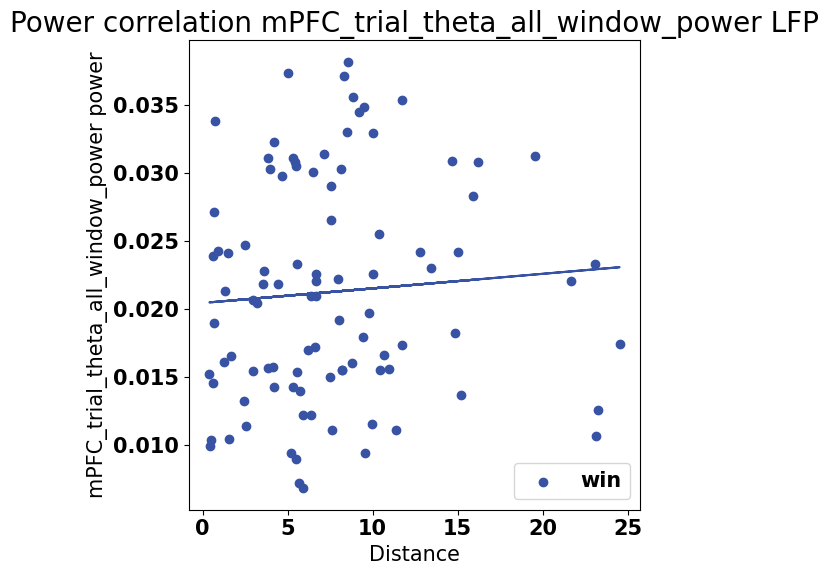

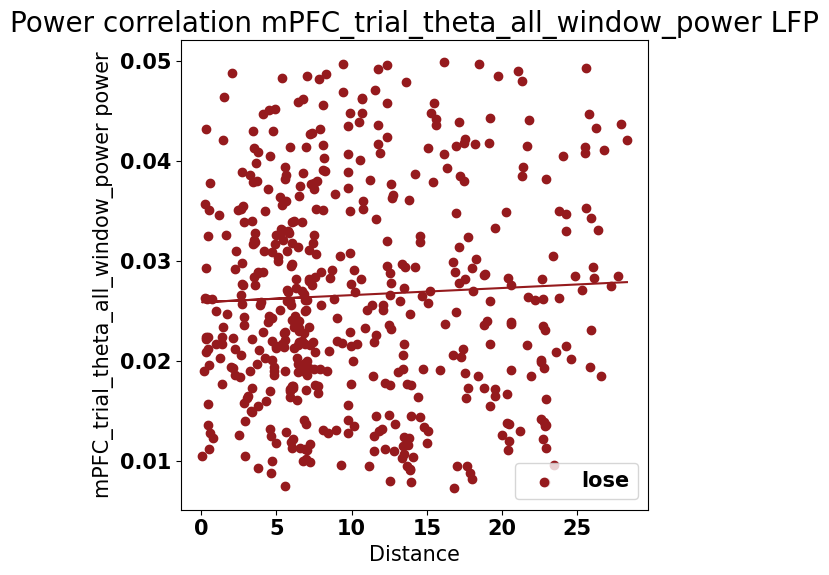

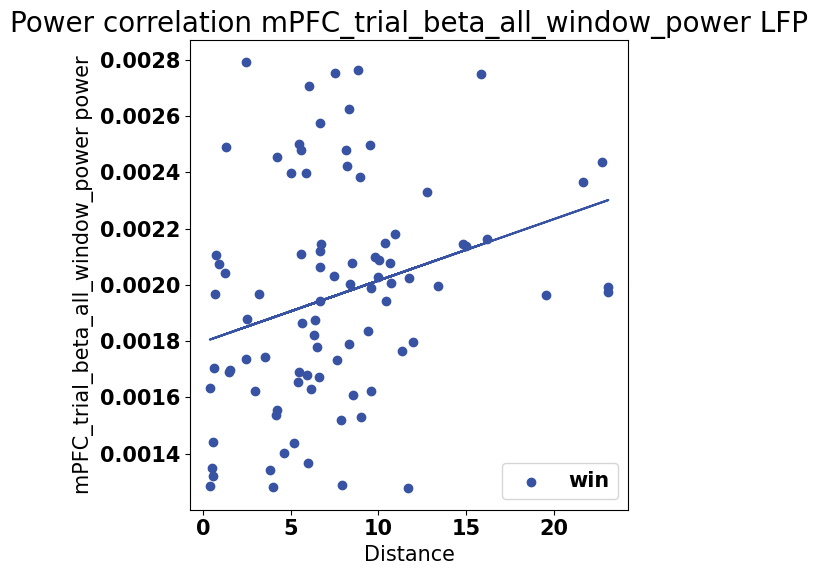

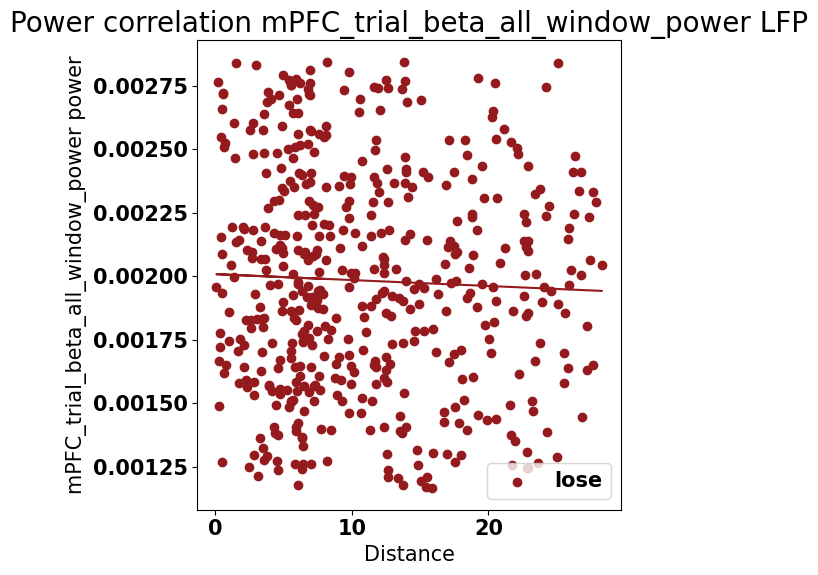

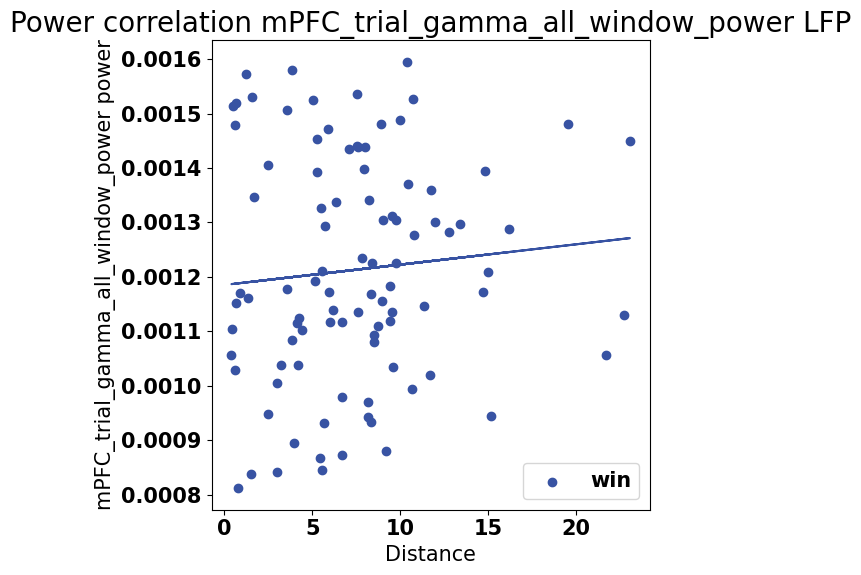

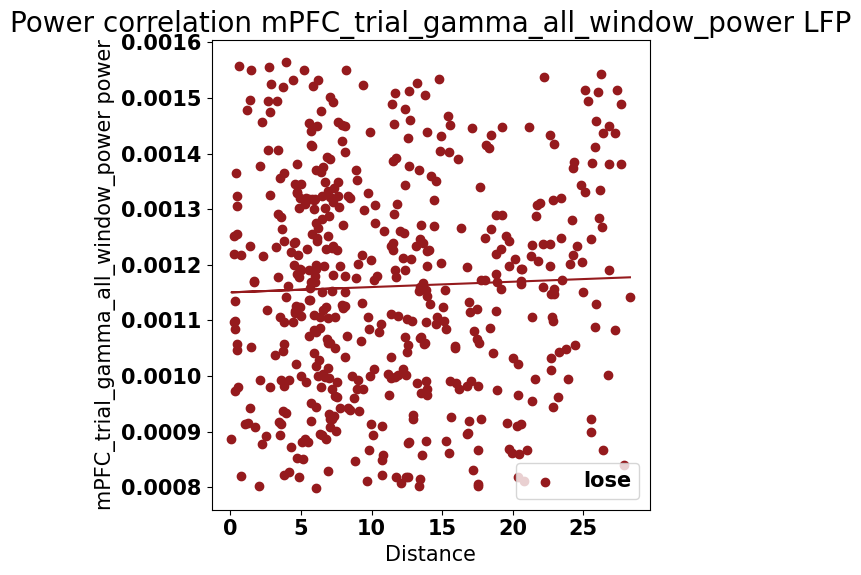

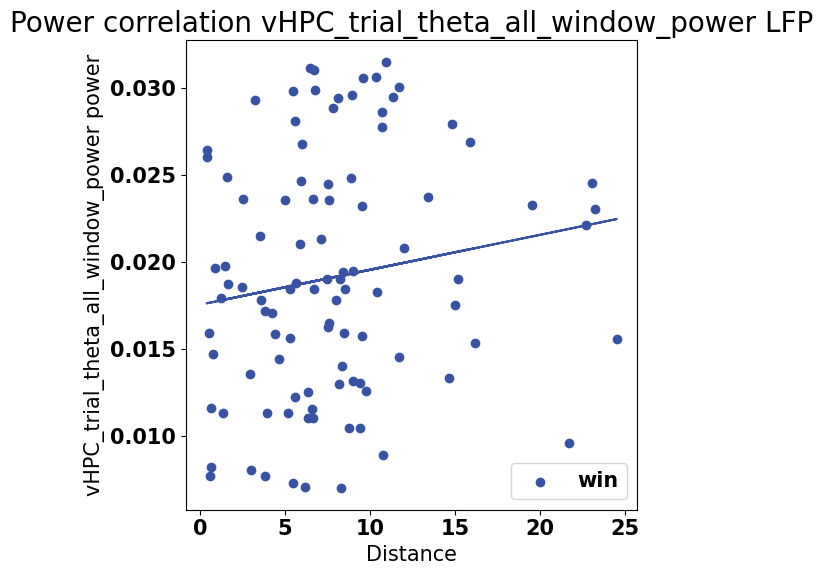

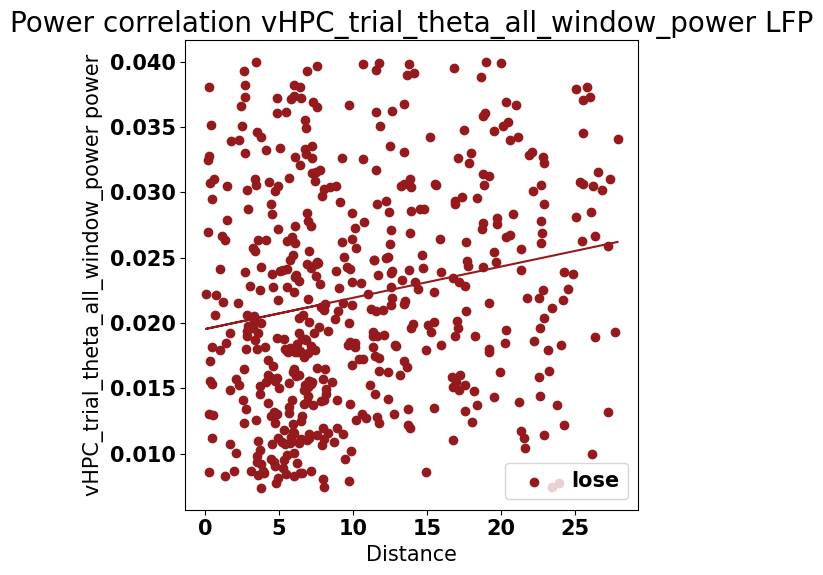

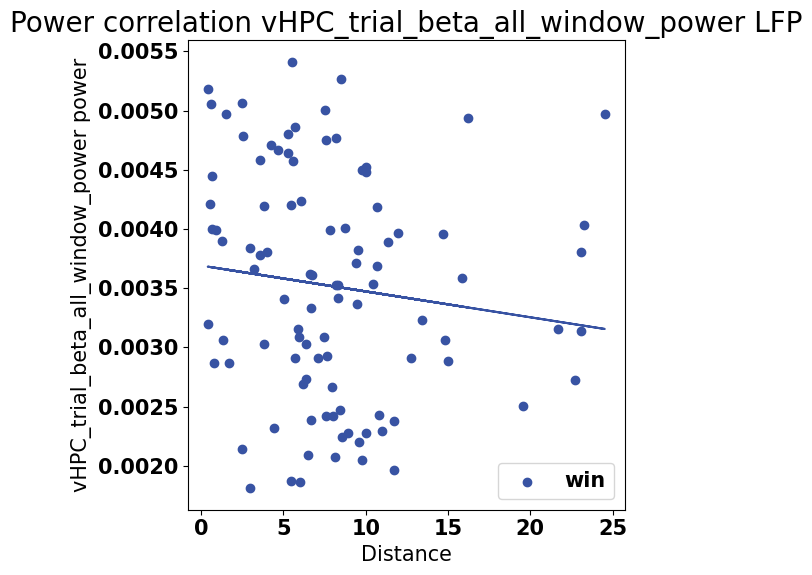

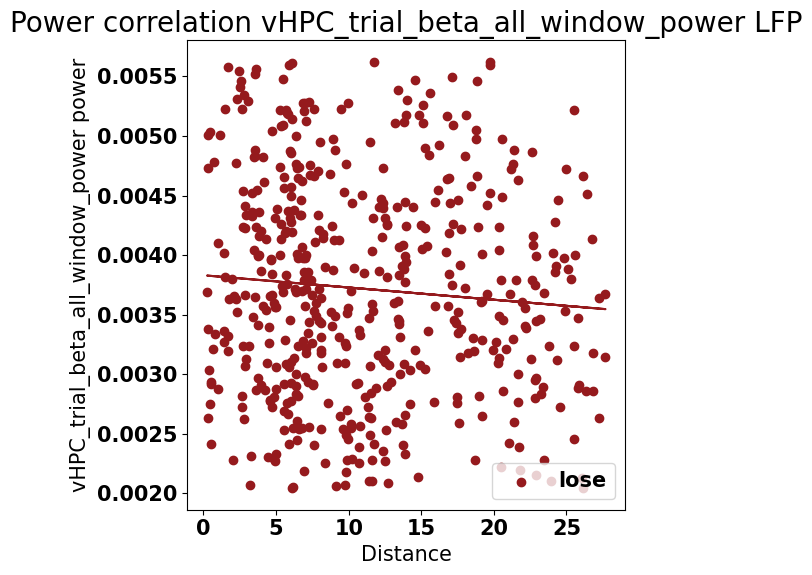

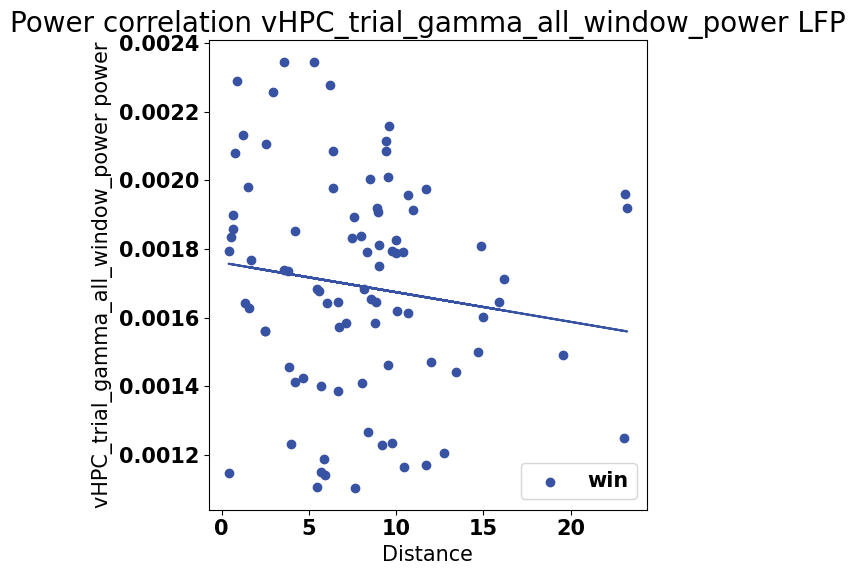

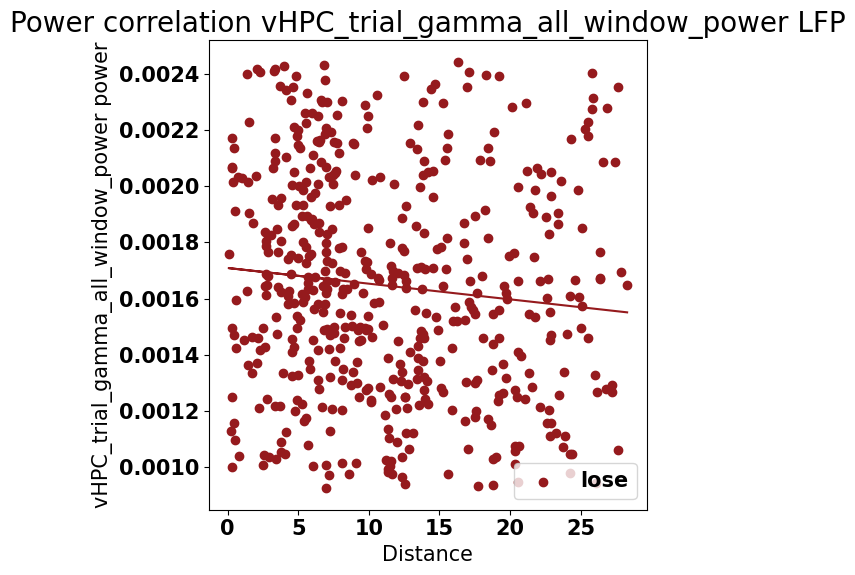

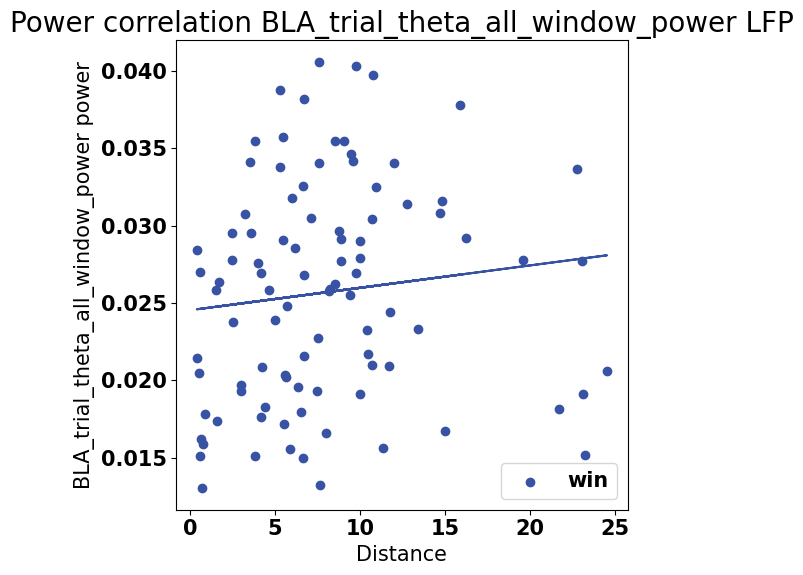

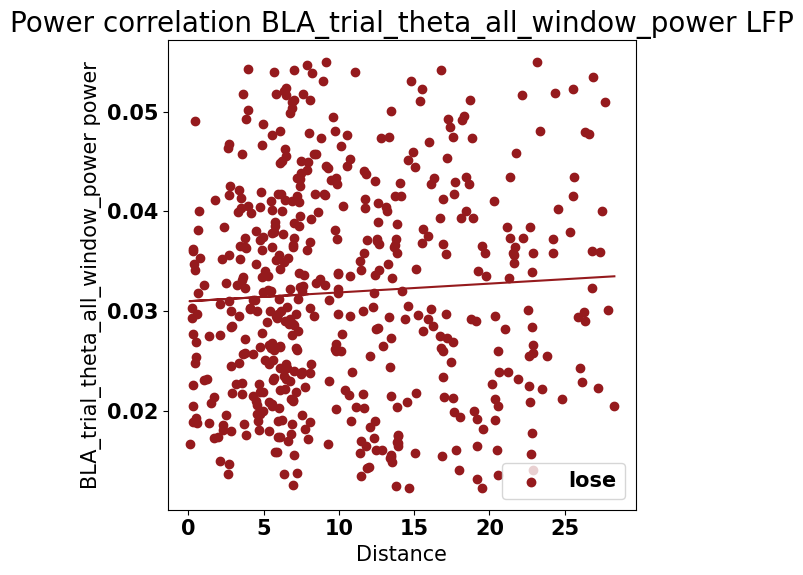

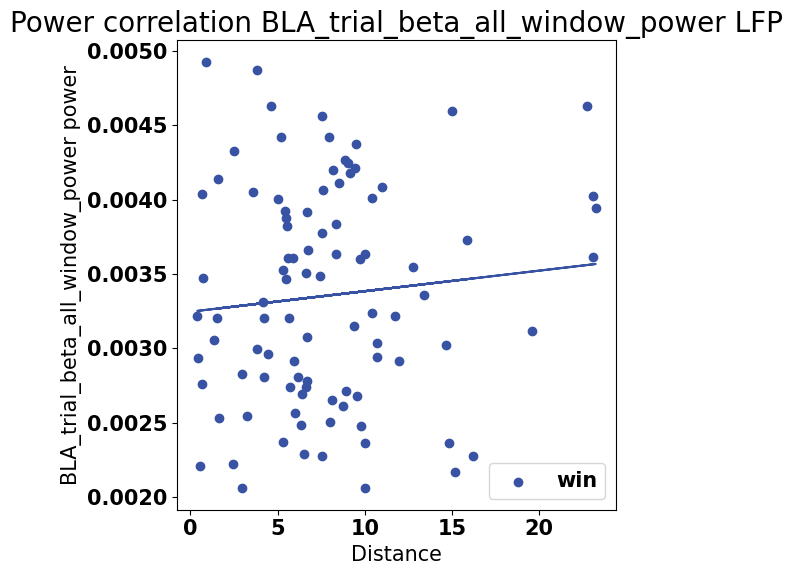

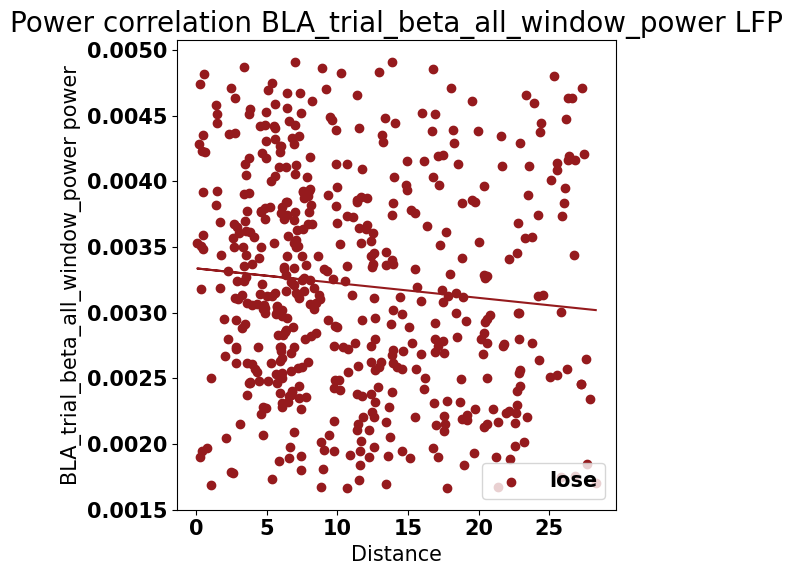

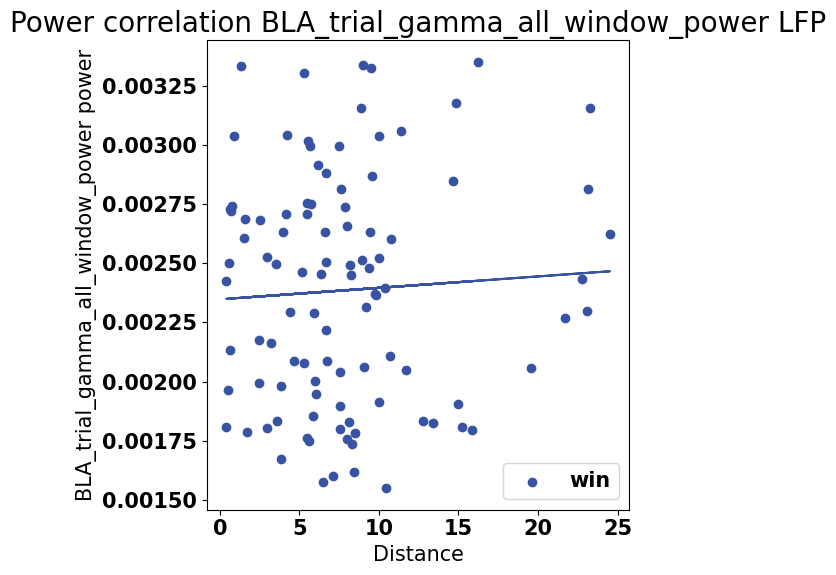

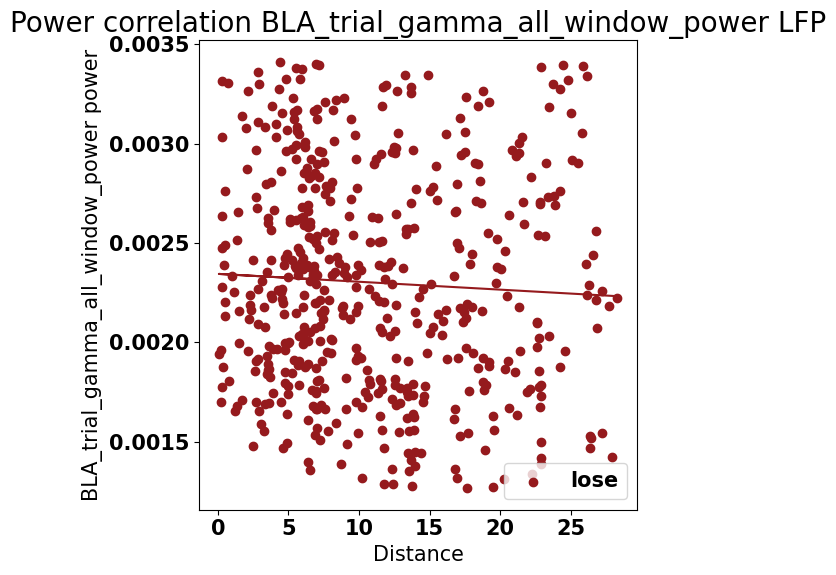

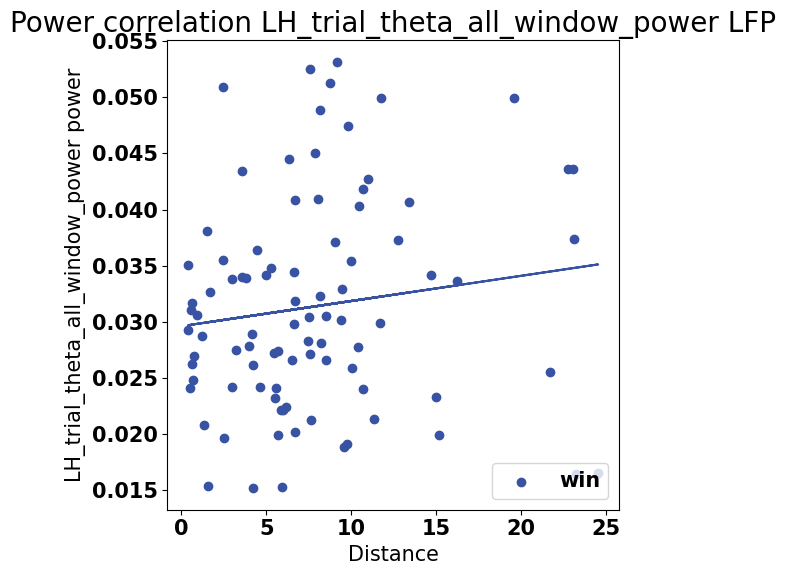

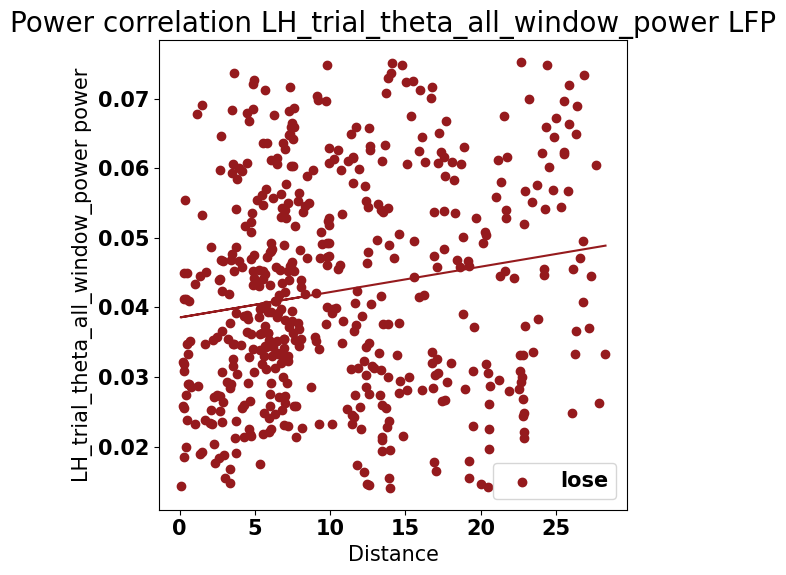

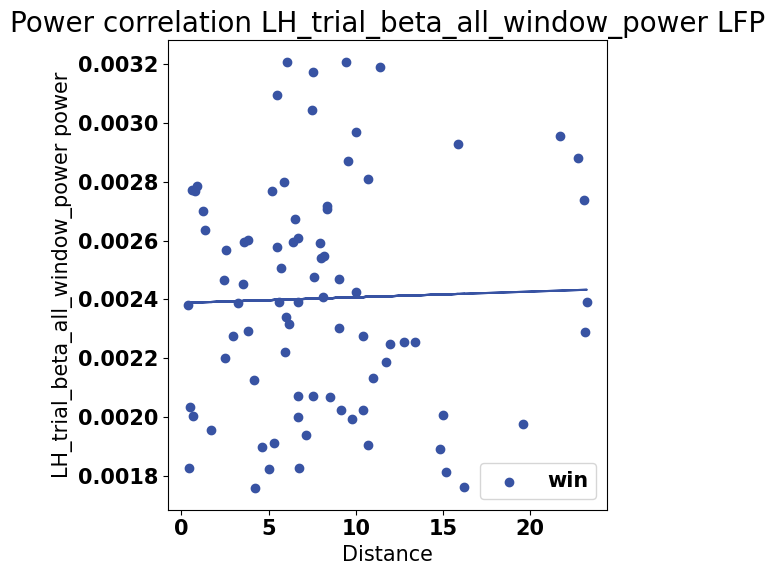

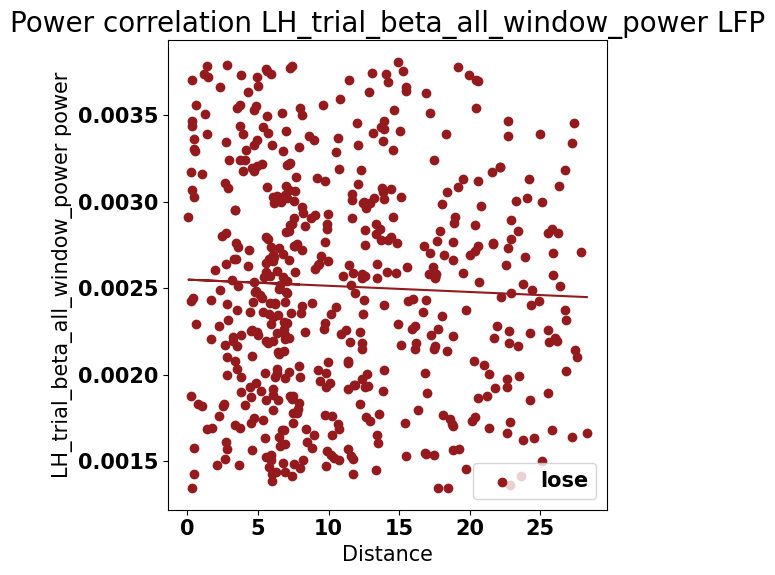

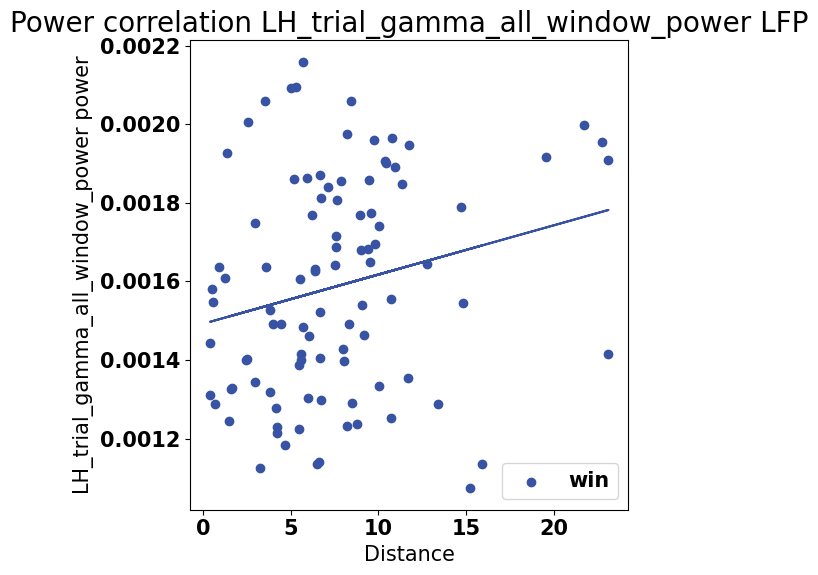

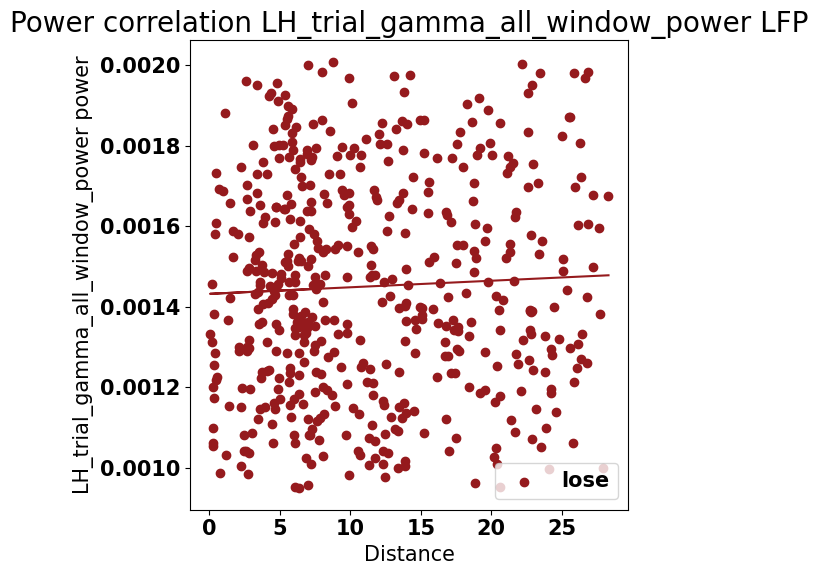

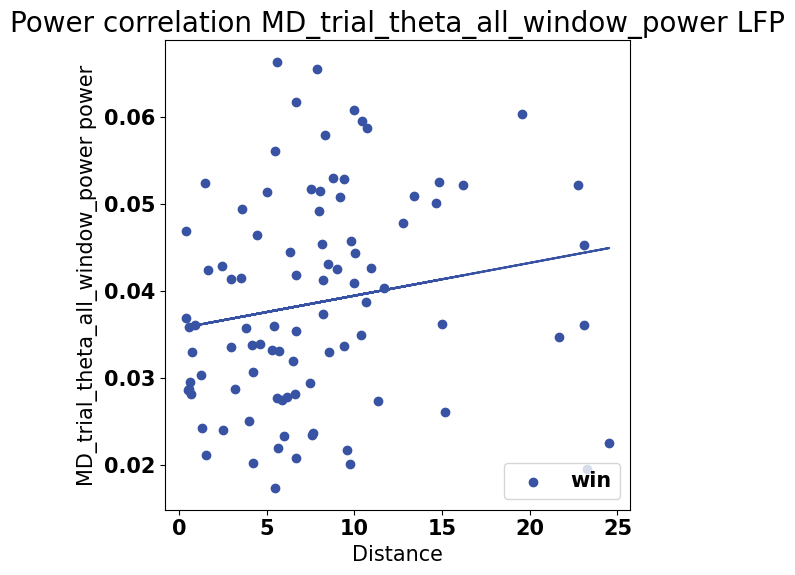

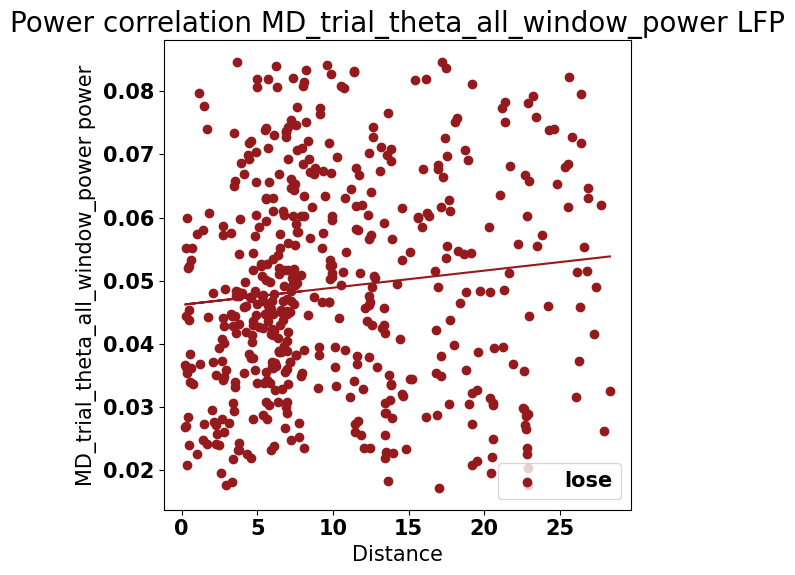

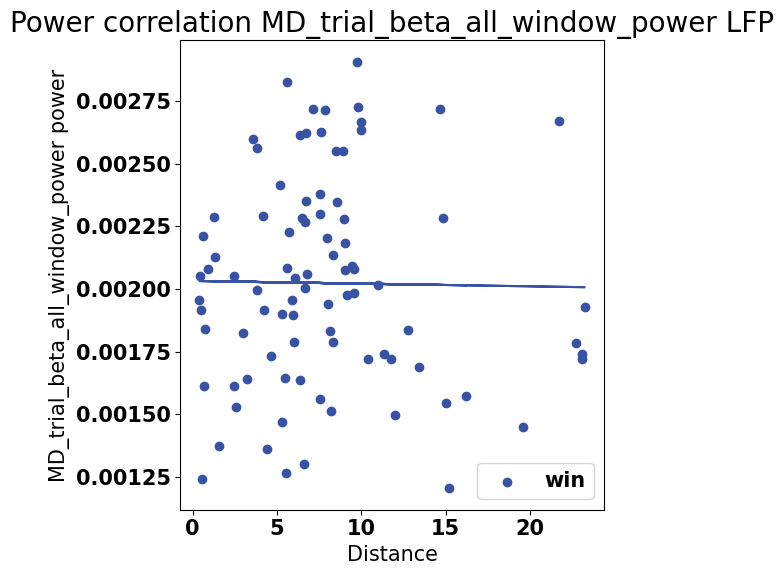

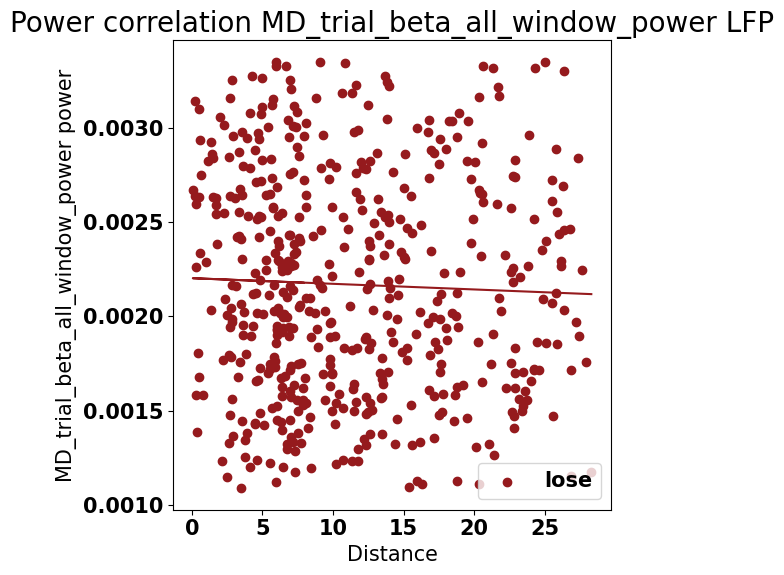

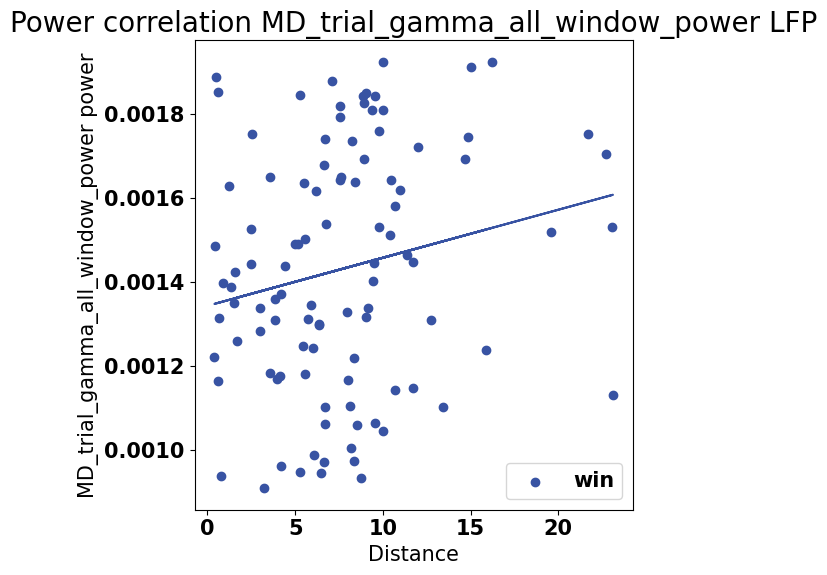

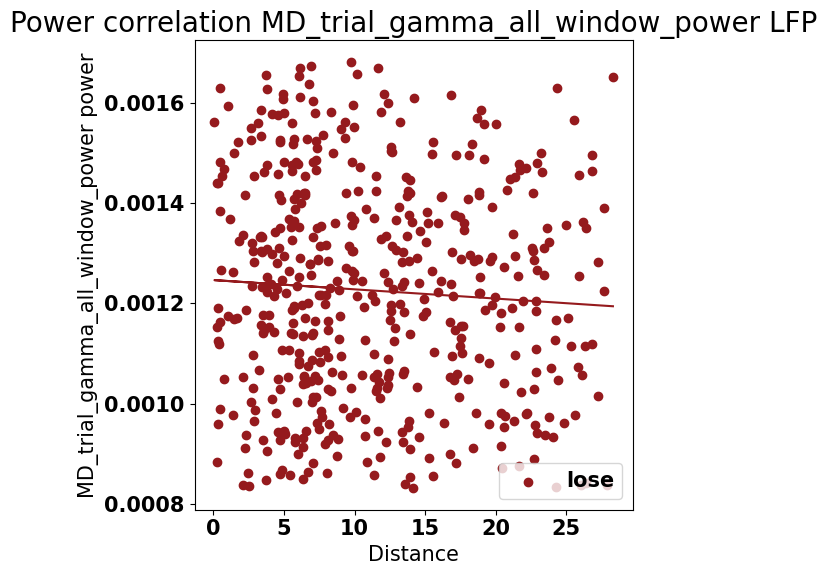

In [64]:
font = {'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

plt.rcParams['figure.figsize'] = [6, 6]

for region_band_col in ALL_REGION_BAND_COL:
    region = region_band_col.split("_")[0]
    band = region_band_col.split("_")[2]
    for outcome in subject_df["trial_outcome"].unique():
        try:
            current_df = subject_df[subject_df["trial_outcome"] == outcome]
            y = np.concatenate(current_df[region_band_col].values)
            x = np.concatenate(current_df["trial_chunked_subject_thorax_to_agent_distance"].values)
            outlier_mask = reject_outliers(y)
            y = y[outlier_mask]
            x = x[outlier_mask]
            # outlier_mask = reject_outliers(x)
            # y = y[outlier_mask]
            # x = x[outlier_mask]
            
            # Perform linear regression to get the slope, intercept and r-value (correlation coefficient)
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            
            # Create a line of best fit using the slope and intercept
            line = slope * x + intercept
            
            # Create scatter plot
            plt.scatter(x=x, y=y, color=OUTCOME_TO_COLOR[outcome], label=outcome)
            
            # Plot line of best fit
            plt.plot(x, line, color=OUTCOME_TO_COLOR[outcome])
            
            # Add R² value to the plot
            # plt.text(0.1, 0.9, f'R = {r_value:.2f}', transform=plt.gca().transAxes)
            
            # Add labels and legend
            plt.title("Power correlation {} LFP".format(region_band_col), fontsize=20)
            plt.xlabel('{}'.format("Distance"))
            plt.ylabel('{} power'.format(region_band_col))
            plt.legend(loc="lower right")
            # ax.get_legend().remove()
            # plt.ylim(0,0.1)
            # plt.xlim(0,10)
            plt.tight_layout()
            # plt.savefig("./proc/power_correlation/all_condition_{}_{}_power_correlation_of_zscored_{}_lfp.png".format(region_1_basename, region_2_basename, band))
            # Display the plot
            plt.show()
        except:
            break



# Parsing by distance to reward port

- Getting a mask for each segment based on distance

In [107]:
all_bins = set(x for lst in MERGED_LFP_AND_SLEAP["binned_trial_subject_thorax_to_agent_distance"] for x in lst)

TypeError: 'float' object is not iterable

In [144]:
all_bins = [0,1]

In [147]:
all_bin_df = []
for bin in all_bins:
    try:
        current_df = MERGED_LFP_AND_SLEAP.copy()
        current_df["binned_trial_distance_mask"] = current_df["binned_trial_subject_thorax_to_agent_distance"].apply(lambda x: [index for index, num in enumerate(x) if num == bin])
        current_df["binned_baseline_distance_mask"] = current_df["binned_trial_subject_thorax_to_agent_distance"].apply(lambda x: [index for index, num in enumerate(x) if num == bin])
        for col in baseline_windowed_power_columns:
            region_and_baseline_or_trial = "_".join(col.split("_")[:2])
            current_df["{}_distance_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = current_df.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_baseline_distance_mask"]]), axis=0), axis=1)
    
        for col in trial_windowed_power_columns:
            region_and_baseline_or_trial = "_".join(col.split("_")[:2])
            current_df["{}_distance_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = current_df.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_trial_distance_mask"]]), axis=0), axis=1)
        
        current_df["distance_bin"] = bin
        all_bin_df.append(current_df)
    except:
        continue
        
    
    


In [148]:
DISTANCE_PARSED_MERGED_LFP_AND_SLEAP = pd.concat(all_bin_df).reset_index(drop=True)

ValueError: No objects to concatenate

## Plotting all the similar velocities together

In [ ]:
window_averaged_power_columns = [col for col in DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.columns if "distance_parsed_window_averaged_power" in col]

In [ ]:
window_averaged_power_columns

- Grouping by trial outcome and distance

In [108]:
MERGED_LFP_AND_SLEAP.head()

time                                     recording_file  video_number  \
0  30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
1  32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
2  34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
3  35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
4  37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   

  current_subject                            mPFC_baseline_lfp_trace  \
0             6.1  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1             6.1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2             6.1  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3             6.1  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4             6.1  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                                mPFC_trial_lfp_trace  \
0  [0.50154364, 0.29617018, 0.22050627, 0.1145767...   
1  [0.31995025, 0.16429879, 0.010809131, 0.067016...   
2  [-0.13835686, 0.42804158, 0.5945022, 0.3134648...   
3  [-0.32211208, 0.023780087, 0.13835686, -0.1102...   
4  [-2.9508927, -2.998453, -2.3282866, -2.0104983...   

                     mPFC_baselineandtrial_lfp_trace  \
0  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                             vHPC_baseline_lfp_trace  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...   

                                vHPC_trial_lfp_trace  \
0  [-1.1479185, -1.1806493, -1.1432426, -1.139735...   
1  [-1.0205019, -0.9152954, -0.9947847, -0.976081...   
2  [0.47109076, 0.34016728, 0.18352668, 0.174175,...   
3  [0.15780956, 0.047927346, -0.14728892, -0.3565...   
4  [-4.0457697, -4.2304654, -3.9113393, -3.448431...   

                     vHPC_baselineandtrial_lfp_trace  ...  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...  ...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...  ...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...  ...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...  ...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...  ...   

                   vHPC_trial_gamma_all_window_power  \
0  [0.0020135659368561314, 0.0027292317420363845,...   
1  [0.0026469233388388058, 0.002786741949210294, ...   
2  [0.002100310636076798, 0.0013689602143719167, ...   
3  [0.0021455661138791568, 0.0015922017743831927,...   
4  [0.0013805169079942228, 0.0012943666022251314,...   

                    BLA_trial_theta_all_window_power  \
0  [0.009257916094824863, 0.012381398153461957, 0...   
1  [0.009522372369315574, 0.014633405349354162, 0...   
2  [0.01468855967631073, 0.01533697751247364, 0.0...   
3  [0.024091648332063394, 0.022704888879482264, 0...   
4  [0.02279104576428572, 0.01717199424140562, 0.0...   

                     BLA_trial_beta_all_window_power  \
0  [0.00427932933687006, 0.0035471877661874306, 0...   
1  [0.004449002119065537, 0.004048083472645959, 0...   
2  [0.0030555019077834742, 0.004015062265600589, ...   
3  [0.002741171523980557, 0.0023554679645659935, ...   
4  [0.003470137746906074, 0.0023129991129627616, ...   

                    BLA_trial_gamma_all_window_power  \
0  [0.0048310774595096495, 0.004187247842219092, ...   
1  [0.002579949083625546, 0.00350423590207247, 0....   
2  [0.002735393057006174, 0.004032022446035748, 0...   
3  [0.0024532923120036683, 0.0029159543592224297,...   
4  [0.003481575027399427, 0.0028723504767116706, ...   

                     LH_trial_

In [109]:
grouped_all_trials_df = DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.groupby(['trial_outcome', 'distance_bin']).agg({k: lambda x: np.vstack([arr for arr in x.tolist() if not np.any(np.isnan(arr))]) for k in window_averaged_power_columns}).reset_index()

In [110]:
grouped_all_trials_df = pd.melt(grouped_all_trials_df, id_vars =['trial_outcome', 'distance_bin'], value_vars =grouped_all_trials_df.drop(columns=["trial_outcome", "distance_bin"]).columns, value_name="power", var_name="region_and_baseline_or_trial") 

In [111]:
grouped_all_trials_df.head()

trial_outcome  distance_bin  \
0          lose             0   
1          lose             1   
2      omission             0   
3      omission             1   
4      rewarded             0   

                        region_and_baseline_or_trial  \
0  mPFC_baseline_distance_parsed_window_averaged_...   
1  mPFC_baseline_distance_parsed_window_averaged_...   
2  mPFC_baseline_distance_parsed_window_averaged_...   
3  mPFC_baseline_distance_parsed_window_averaged_...   
4  mPFC_baseline_distance_parsed_window_averaged_...   

                                               power  
0  [[0.01297652363542778, 0.020910742959545314, 0...  
1  [[0.017640261055241968, 0.02109239205307361, 0...  
2  [[0.01623660602102775, 0.015745623179016326, 0...  
3  [[0.036614773369269826, 0.029042845886774946, ...  
4  [[0.005668784994319581, 0.008323723592713276, ...

In [112]:
grouped_all_trials_df["brain_region"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [113]:
grouped_all_trials_df["trial_or_baseline"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [114]:
grouped_all_trials_df = grouped_all_trials_df[grouped_all_trials_df["trial_or_baseline"] == "trial"].reset_index(drop=True)

In [115]:
grouped_all_trials_df["mean_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanmean(np.vstack(x), axis=0))

In [116]:
grouped_all_trials_df["std_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanstd(np.vstack(x), axis=0))

In [117]:
grouped_all_trials_df["n_trials"] = grouped_all_trials_df["power"].apply(lambda x: np.sum(~np.isnan(x), axis=0))

In [118]:
grouped_all_trials_df["sem_power"] = grouped_all_trials_df.apply(lambda x: x["std_power"] / np.sqrt(x["n_trials"]), axis=1)

In [119]:
grouped_all_trials_df["trial_outcome"].unique()

array(['lose', 'omission', 'rewarded', 'win'], dtype=object)

In [120]:
grouped_all_trials_df

trial_outcome  distance_bin  \
0           lose             0   
1           lose             1   
2       omission             0   
3       omission             1   
4       rewarded             0   
5       rewarded             1   
6            win             0   
7            win             1   
8           lose             0   
9           lose             1   
10      omission             0   
11      omission             1   
12      rewarded             0   
13      rewarded             1   
14           win             0   
15           win             1   
16          lose             0   
17          lose             1   
18      omission             0   
19      omission             1   
20      rewarded             0   
21      rewarded             1   
22           win             0   
23           win             1   
24          lose             0   
25          lose             1   
26      omission             0   
27      omission             1   
28      rewarded             0   
29      rewarded             1   
30           win             0   
31           win             1   
32          lose             0   
33          lose             1   
34      omission             0   
35      omission             1   
36      rewarded             0   
37      rewarded             1   
38           win             0   
39           win             1   

                        region_and_baseline_or_trial  \
0   mPFC_trial_distance_parsed_window_averaged_power   
1   mPFC_trial_distance_parsed_window_averaged_power   
2   mPFC_trial_distance_parsed_window_averaged_power   
3   mPFC_trial_distance_parsed_window_averaged_power   
4   mPFC_trial_distance_parsed_window_averaged_power   
5   mPFC_trial_distance_parsed_window_averaged_power   
6   mPFC_trial_distance_parsed_window_averaged_power   
7   mPFC_trial_distance_parsed_window_averaged_power   
8   vHPC_trial_distance_parsed_window_averaged_power   
9   vHPC_trial_distance_parsed_window_averaged_power   
10  vHPC_trial_distance_parsed_window_averaged_power   
11  vHPC_trial_distance_parsed_window_averaged_power   
12  vHPC_trial_distance_parsed_window_averaged_power   
13  vHPC_trial_distance_parsed_window_averaged_power   
14  vHPC_trial_distance_parsed_window_averaged_power   
15  vHPC_trial_distance_parsed_window_averaged_power   
16   BLA_trial_distance_parsed_window_averaged_power   
17   BLA_trial_distance_parsed_window_averaged_power   
18   BLA_trial_distance_parsed_window_averaged_power   
19   BLA_trial_distance_parsed_window_averaged_power   
20   BLA_trial_distance_parsed_window_averaged_power   
21   BLA_trial_distance_parsed_window_averaged_power   
22   BLA_trial_distance_parsed_window_averaged_power   
23   BLA_trial_distance_parsed_window_averaged_power   
24    LH_trial_distance_parsed_window_averaged_power   
25    LH_trial_distance_parsed_window_averaged_power   
26    LH_trial_distance_parsed_window_averaged_power   
27    LH_trial_distance_parsed_window_averaged_power   
28    LH_trial_distance_parsed_window_averaged_power   
29    LH_trial_distance_parsed_window_averaged_power   
30    LH_trial_distance_parsed_window_averaged_power   
31    LH_trial_distance_parsed_window_averaged_power   
32    MD_trial_distance_parsed_window_averaged_power   
33    MD_trial_distance_parsed_window_averaged_power   
34    MD_trial_distance_parsed_window_averaged_power   
35    MD_trial_distance_parsed_window_averaged_power   
36    MD_trial_distance_parsed_window_averaged_power   
37    MD_trial_distance_parsed_window_averaged_power   
38    MD_trial_distance_parsed_window_averaged_power   
39    MD_trial_distance_parsed_window_averaged_power   

                                                power brain_region  \
0   [[0.003049788657835335, 0.015331098458784002, ...         mPFC   
1   [[0.009588922009822663, 0.008775434010514291, ...         mPFC   
2   [[0.02413583457696316, 0.02517160487826337, 0....         mPFC   
3   [[0.01197691868770938, 0.01

## Drawing all distance bins together for each trial outcome

In [121]:
grouped_all_trials_df.head()

trial_outcome  distance_bin  \
0          lose             0   
1          lose             1   
2      omission             0   
3      omission             1   
4      rewarded             0   

                       region_and_baseline_or_trial  \
0  mPFC_trial_distance_parsed_window_averaged_power   
1  mPFC_trial_distance_parsed_window_averaged_power   
2  mPFC_trial_distance_parsed_window_averaged_power   
3  mPFC_trial_distance_parsed_window_averaged_power   
4  mPFC_trial_distance_parsed_window_averaged_power   

                                               power brain_region  \
0  [[0.003049788657835335, 0.015331098458784002, ...         mPFC   
1  [[0.009588922009822663, 0.008775434010514291, ...         mPFC   
2  [[0.02413583457696316, 0.02517160487826337, 0....         mPFC   
3  [[0.01197691868770938, 0.011857243214933274, 0...         mPFC   
4  [[0.01289630952283127, 0.017132387135482142, 0...         mPFC   

  trial_or_baseline                                         mean_power  \
0             trial  [0.01382454998377706, 0.016353583206334565, 0....   
1             trial  [0.016221842557599963, 0.02032448815132888, 0....   
2             trial  [0.02293803095084201, 0.022661680048522582, 0....   
3             trial  [0.011045755017799506, 0.010626336877840942, 0...   
4             trial  [0.010088440178130658, 0.01290808585497358, 0....   

                                           std_power  \
0  [0.012408493254537483, 0.01157886228174933, 0....   
1  [0.024338005326598106, 0.02452433079986367, 0....   
2  [0.05403783696251074, 0.037332347577342134, 0....   
3  [0.01057482956491491, 0.006826165894352863, 0....   
4  [0.006428025581099357, 0.006967533699688814, 0...   

                                            n_trials  \
0  [55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 5...   
1  [81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 8...   
2  [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...   
3  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
4  [86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 8...   

                                           sem_power  
0  [0.0016731608891170475, 0.0015612934715672439,...  
1  [0.0027042228140664562, 0.0027249256444292964,...  
2  [0.012736840318948138, 0.008799318709850602, 0...  
3  [0.0037387668476216605, 0.0024134140967006215,...  
4  [0.0006931518246325874, 0.0007513284812258581,...

In [122]:
ALL_FREQUENCIES = [int(num) for num in DISTANCE_PARSED_MERGED_LFP_AND_SLEAP[[col for col in DISTANCE_PARSED_MERGED_LFP_AND_SLEAP if "frequencies" in col][0]].iloc[0]]

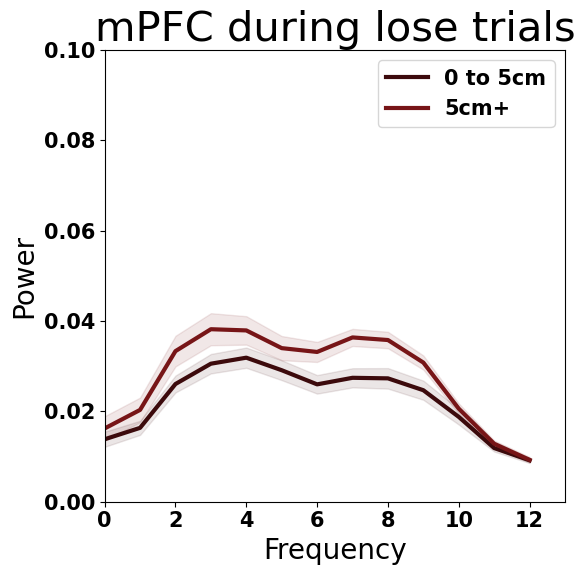

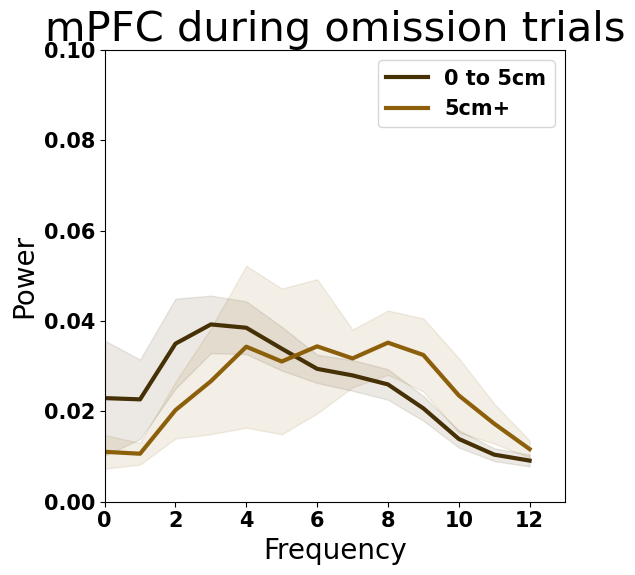

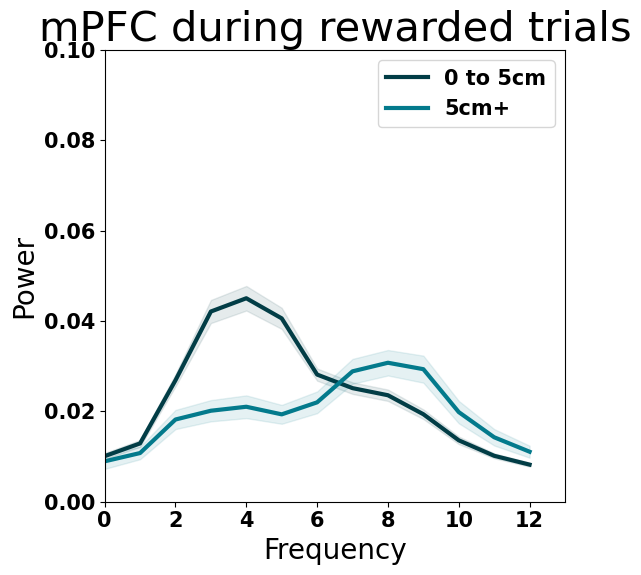

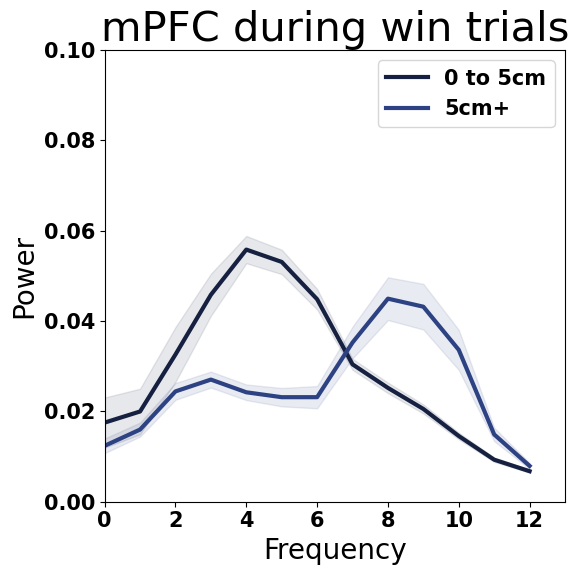

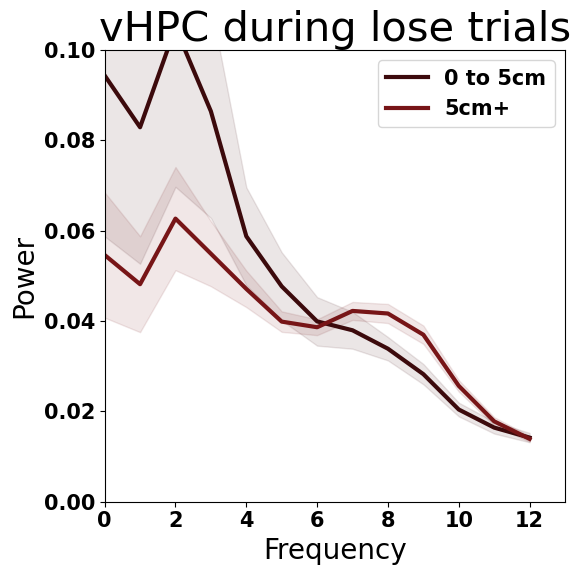

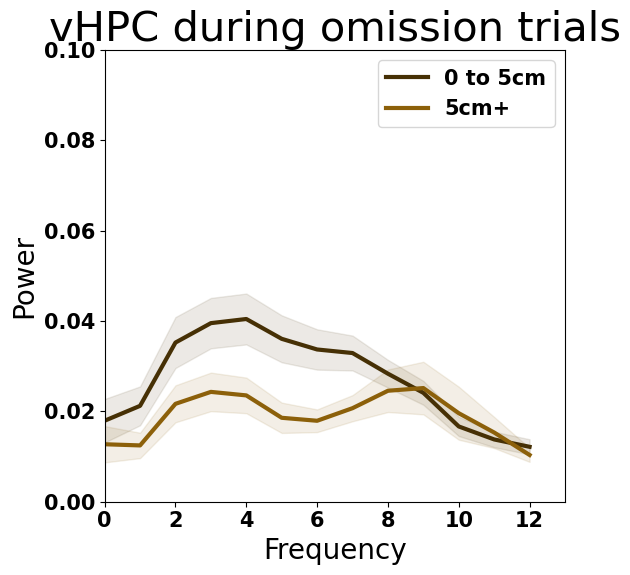

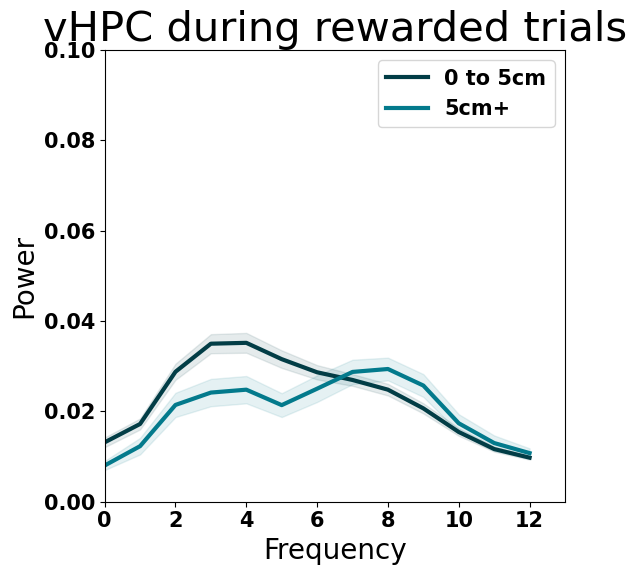

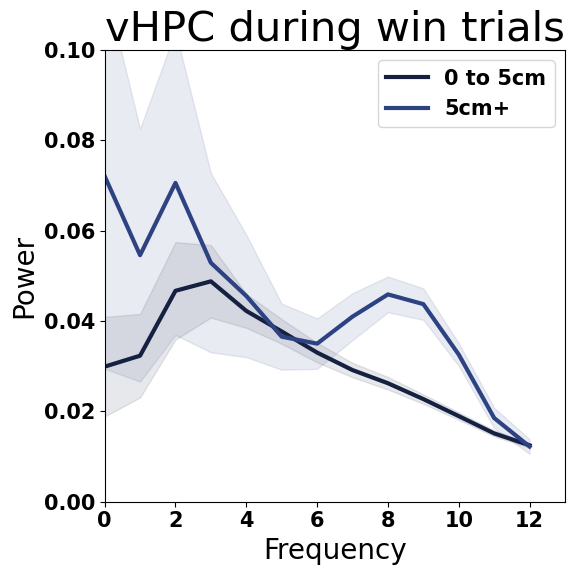

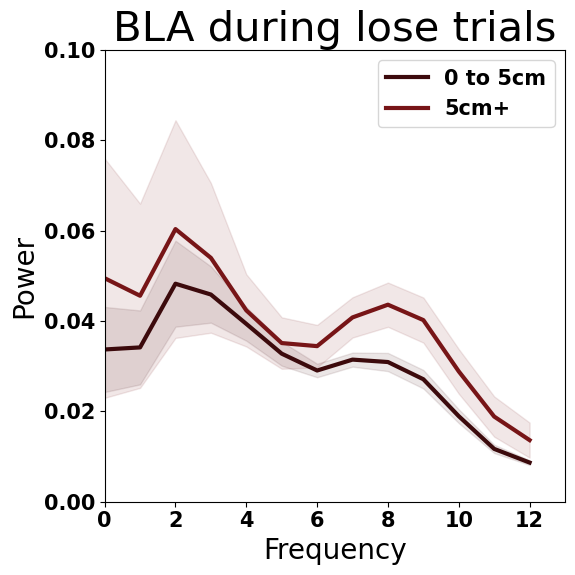

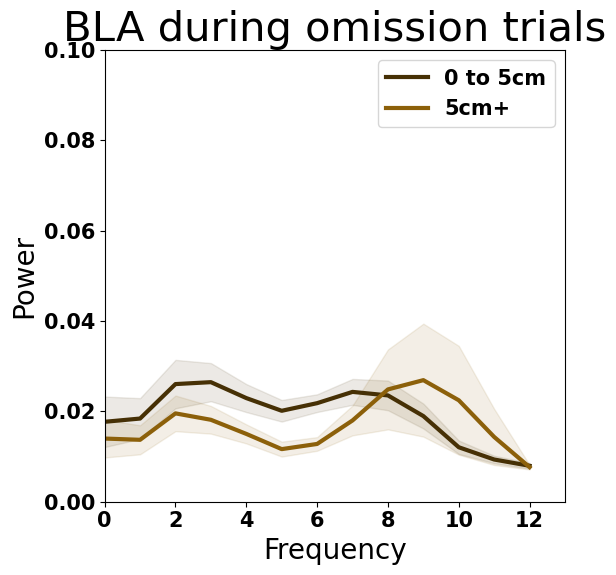

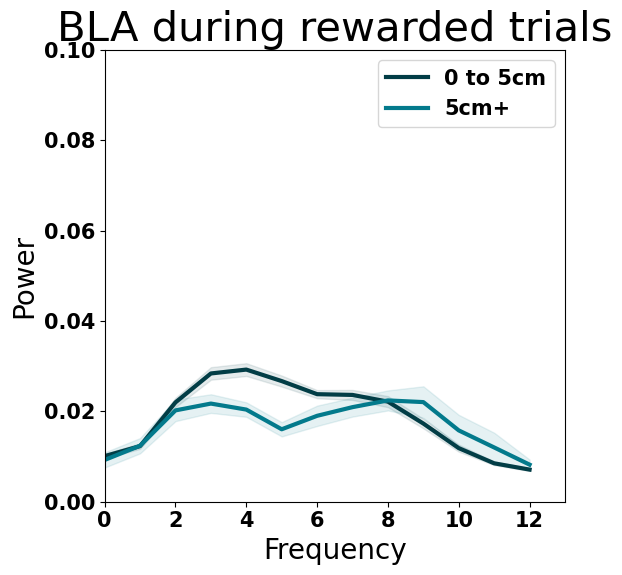

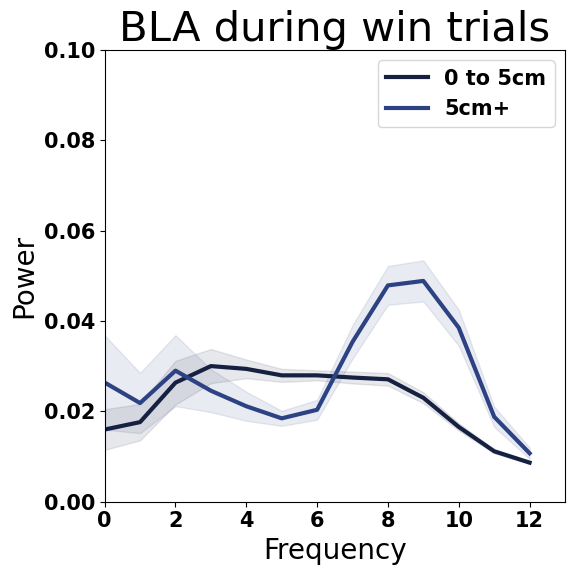

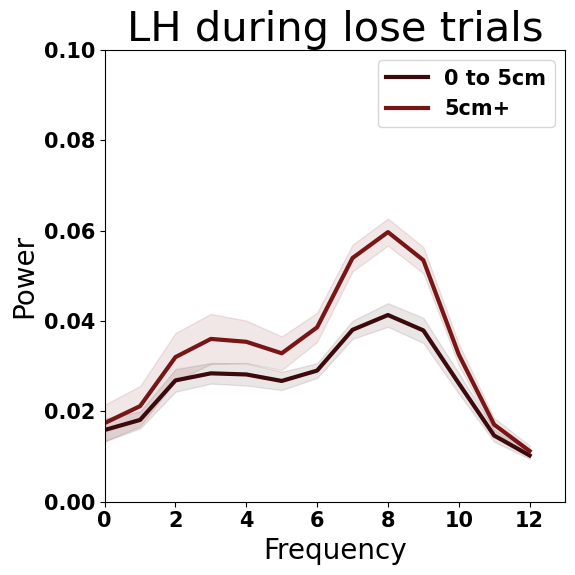

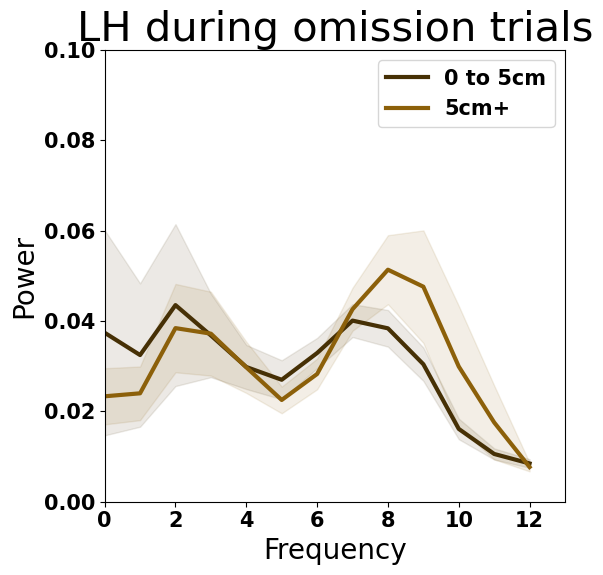

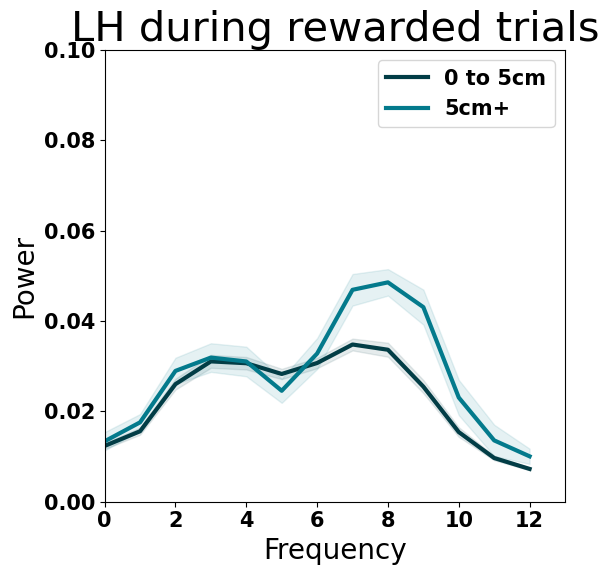

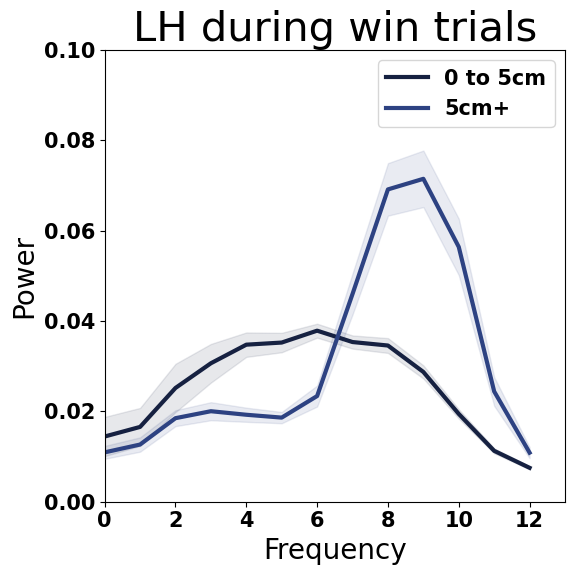

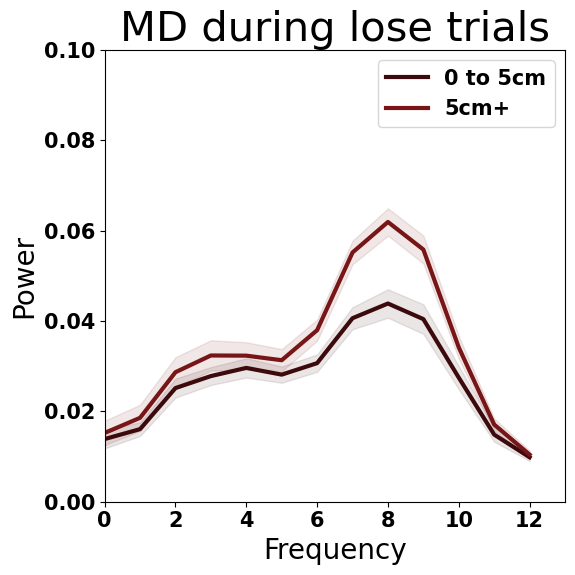

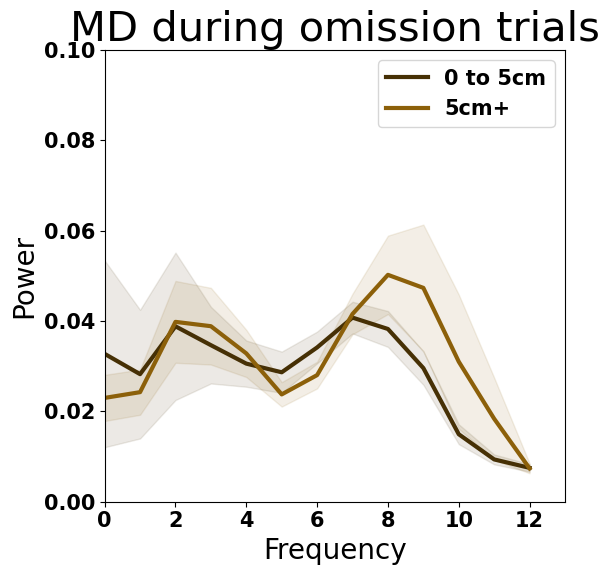

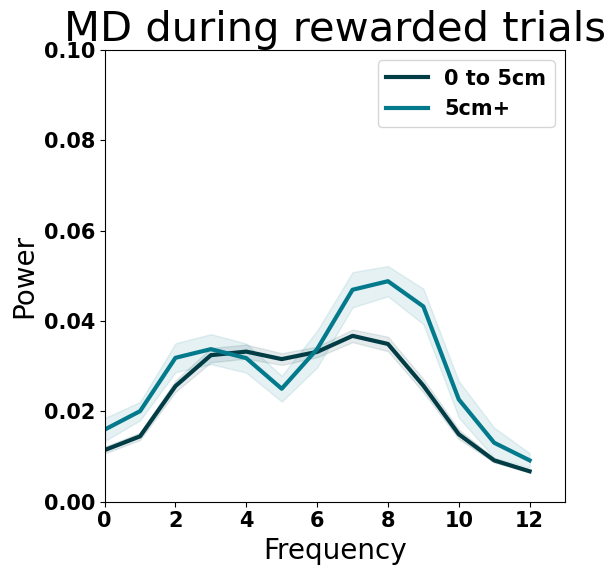

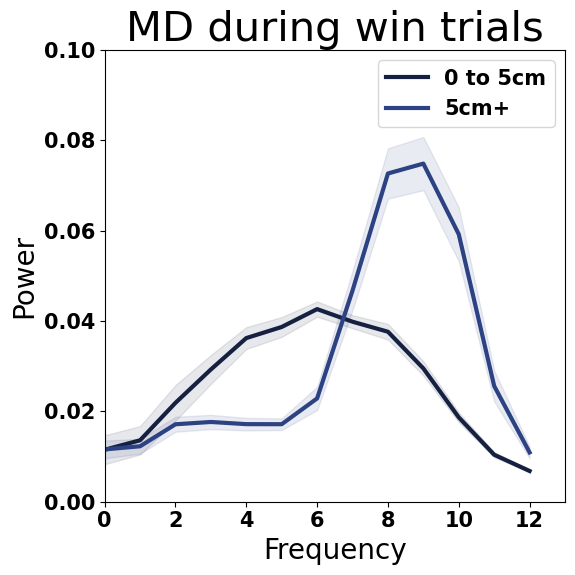

In [123]:
low_freq = 0
high_freq = 13
for region in grouped_all_trials_df["region_and_baseline_or_trial"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["region_and_baseline_or_trial"] == region]

    for outcome in region_df["trial_outcome"].unique():
        fig, ax = plt.subplots()
        plt.title("{} during {} trials".format(region.split("_")[0], outcome), fontsize=30)
        plt.xlabel("Frequency", fontsize=20)
        plt.ylabel("Power", fontsize=20)
        plt.xlim(low_freq, high_freq) 
        # plt.yscale("log")
        plt.ylim(0, 0.1)
        outcome_df = region_df[(region_df["trial_outcome"] == outcome)]
        # Generate gradient colors
        gradient_colors = generate_gradient_colors(OUTCOME_TO_COLOR[outcome], 20)
        
        for index, row in outcome_df.iterrows():           
            current_frequencies = ALL_FREQUENCIES[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
                
            
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{}".format(BIN_TO_DISTANCE[row["distance_bin"]]), linewidth=3, color=gradient_colors[-(row["distance_bin"]+1) *4])
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=gradient_colors[-(row["distance_bin"]+1) *4])
            
            except Exception as e: 
                print(e)
                continue
                
        plt.legend()
        plt.tight_layout()
        plt.savefig("./proc/distance_parsed_power/rce_distance_parsed_lfp_power_freq_{}_to_{}_region_{}_{}.png".format(low_freq, high_freq, region.split("_")[0], outcome))

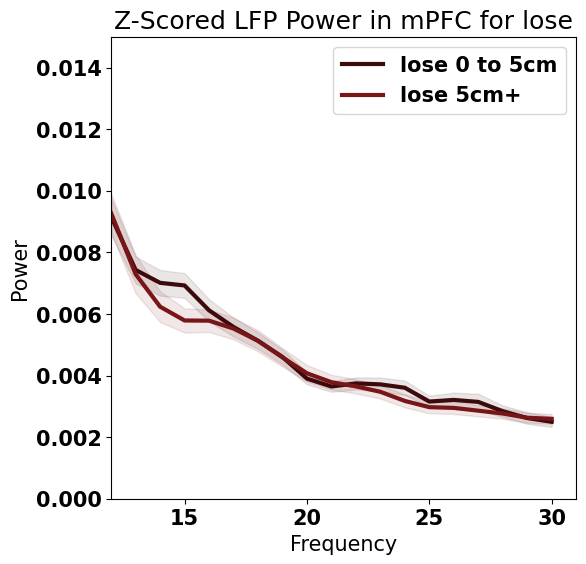

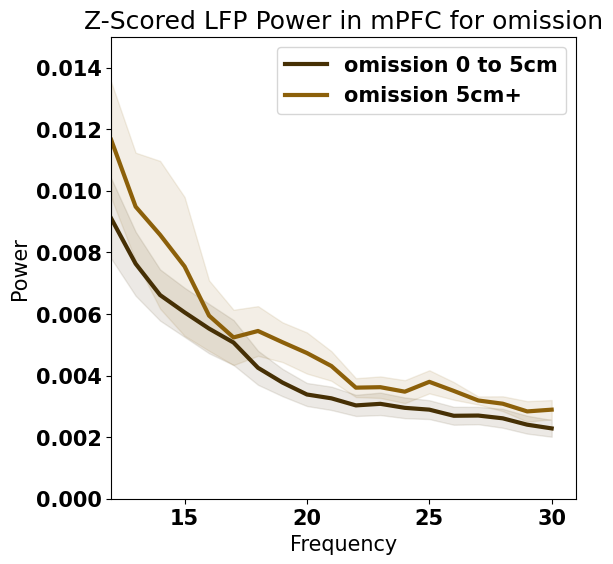

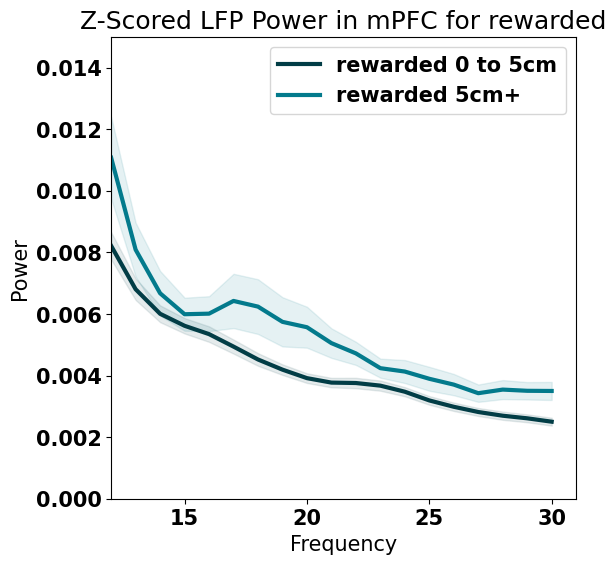

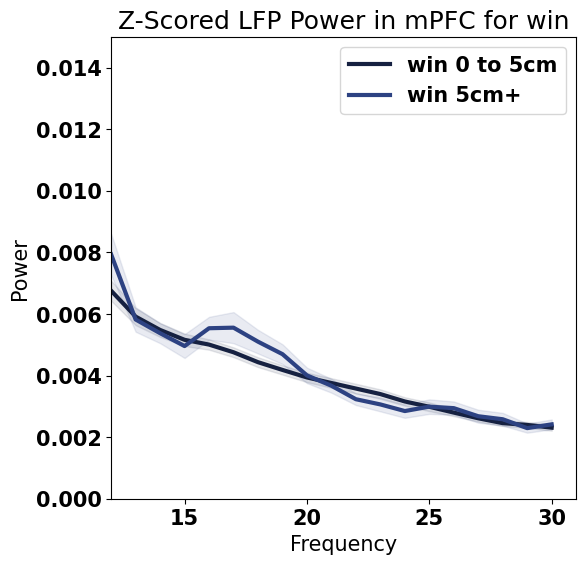

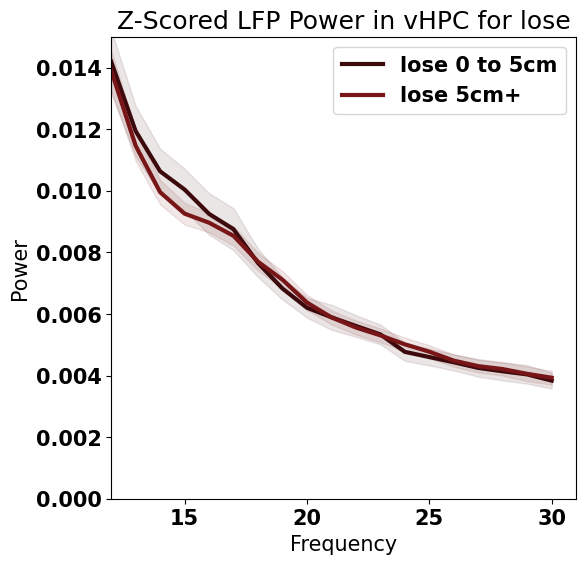

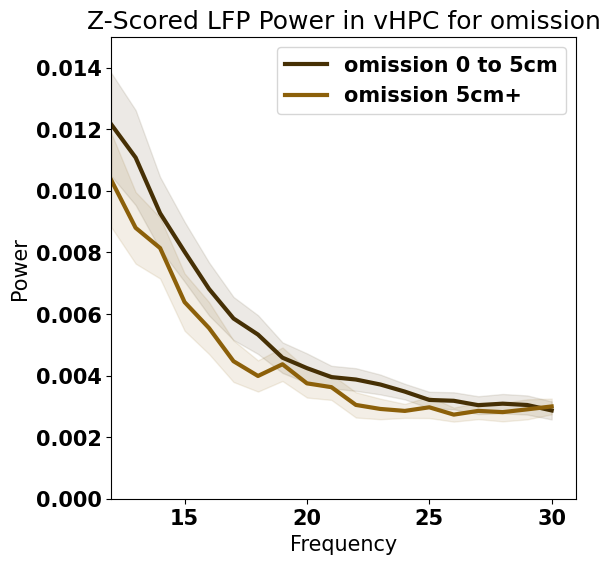

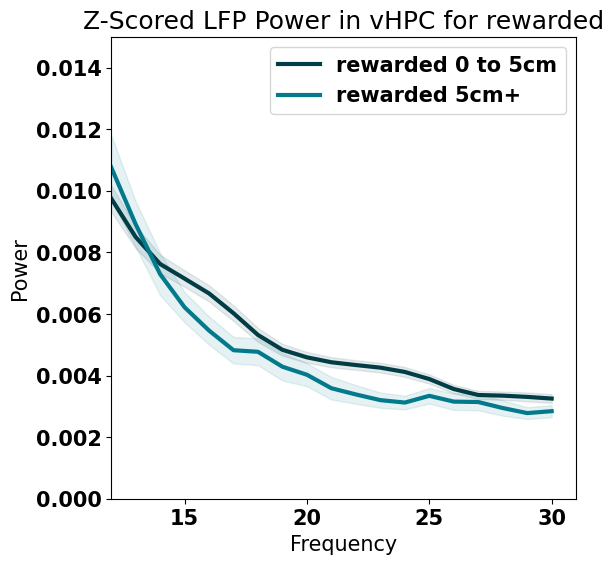

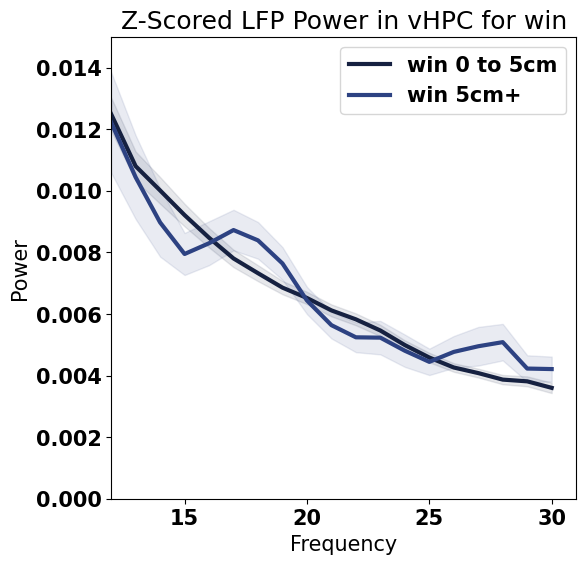

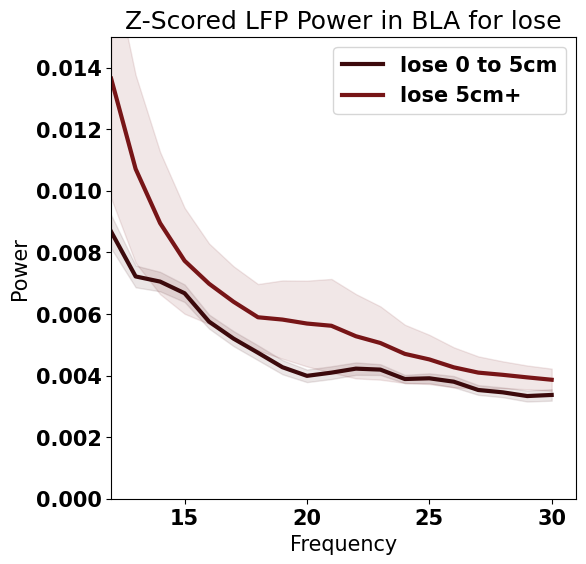

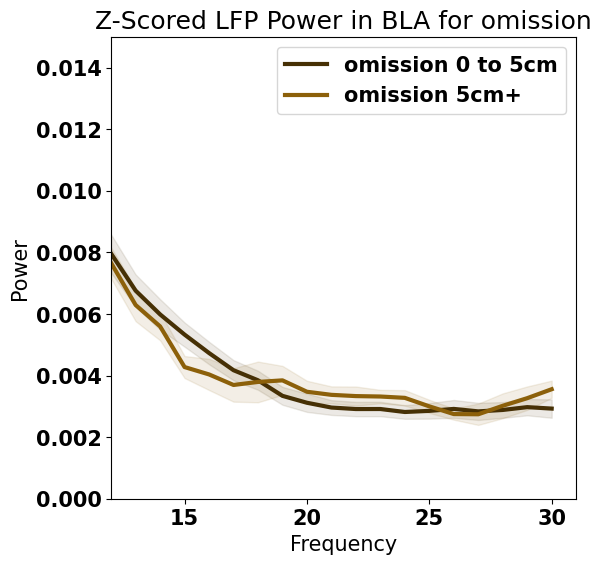

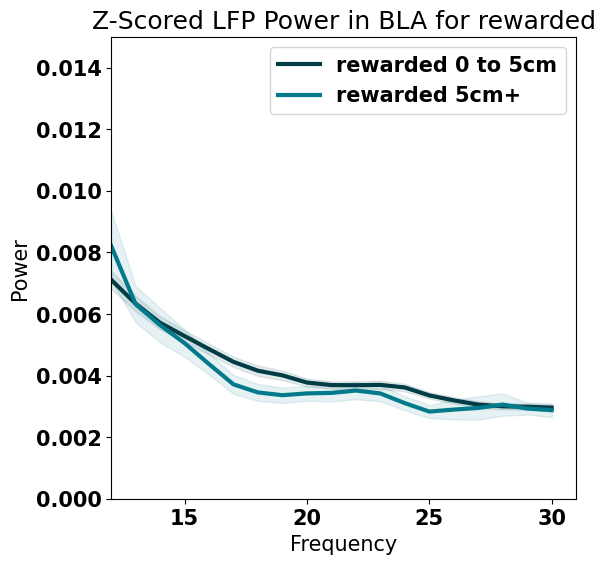

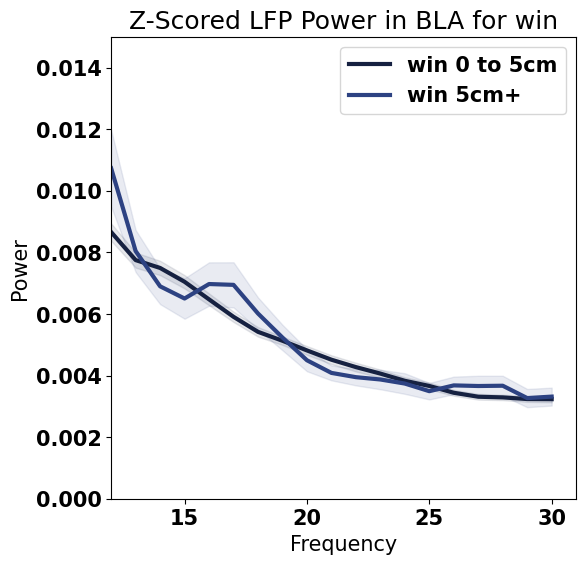

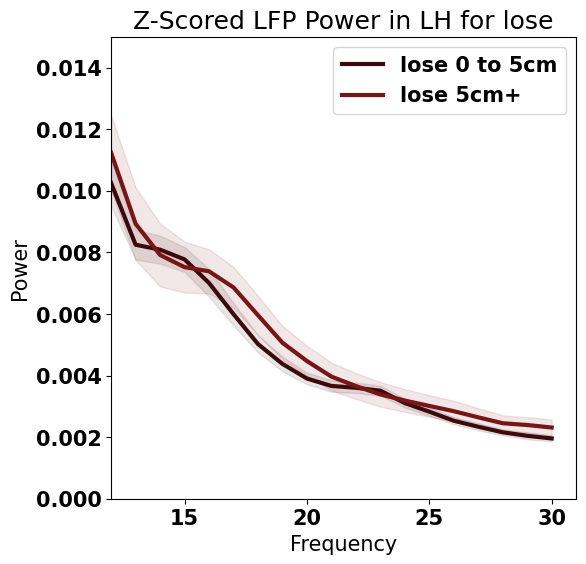

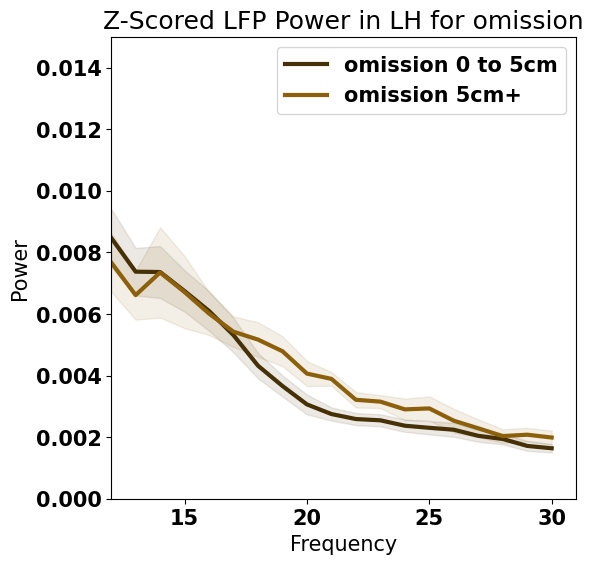

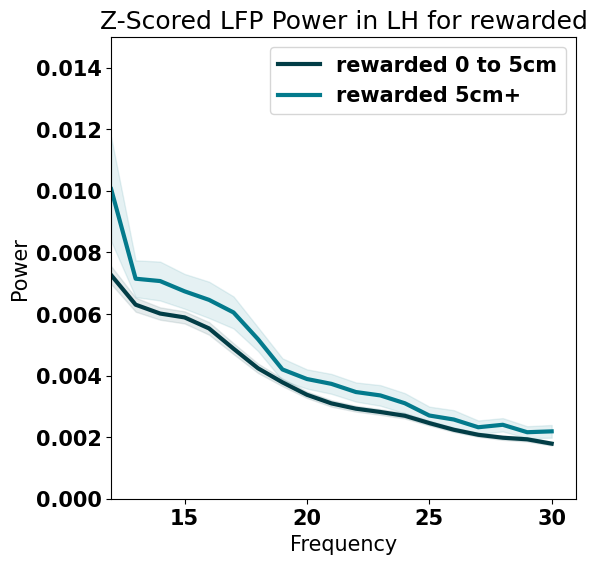

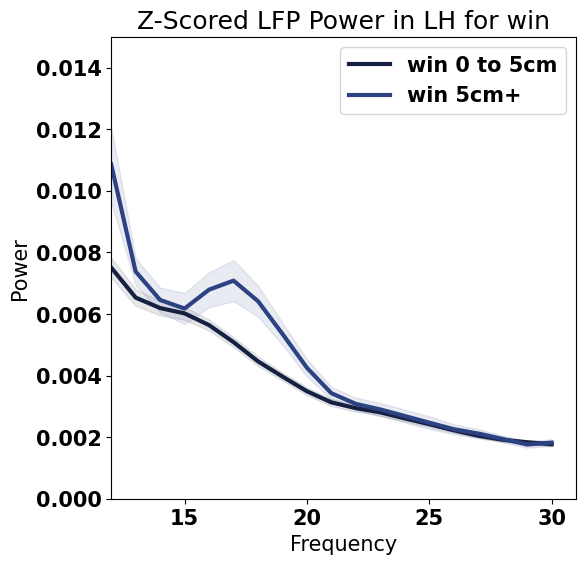

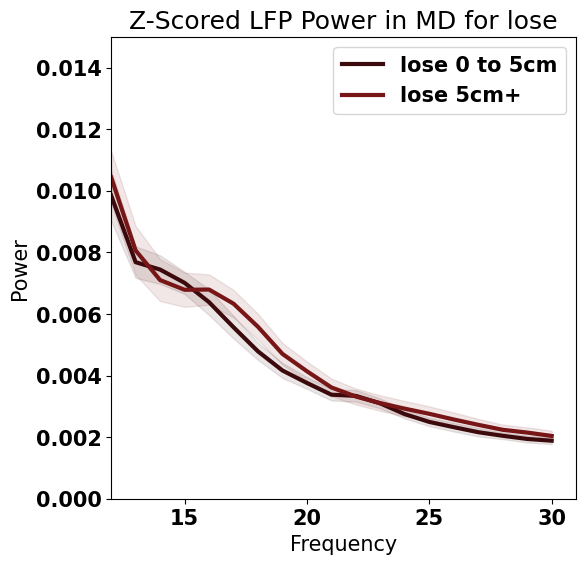

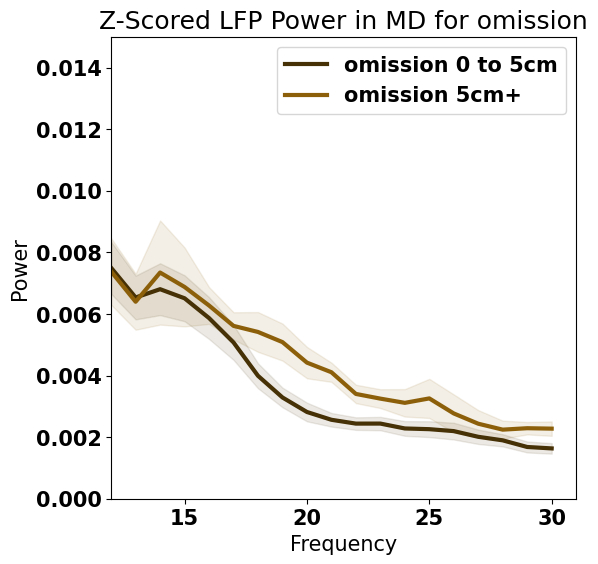

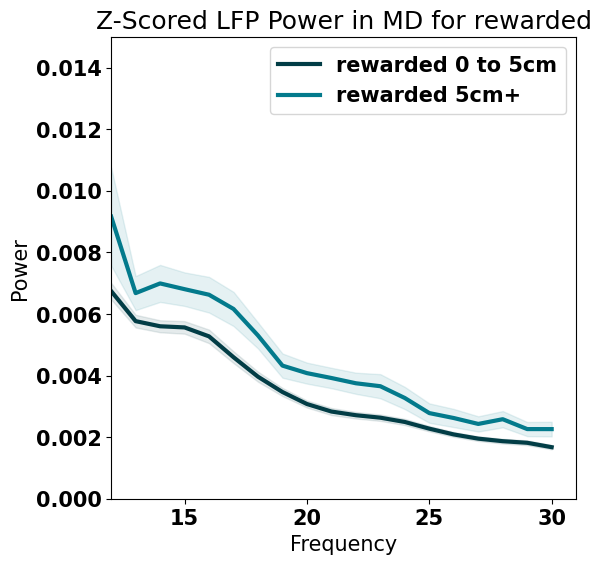

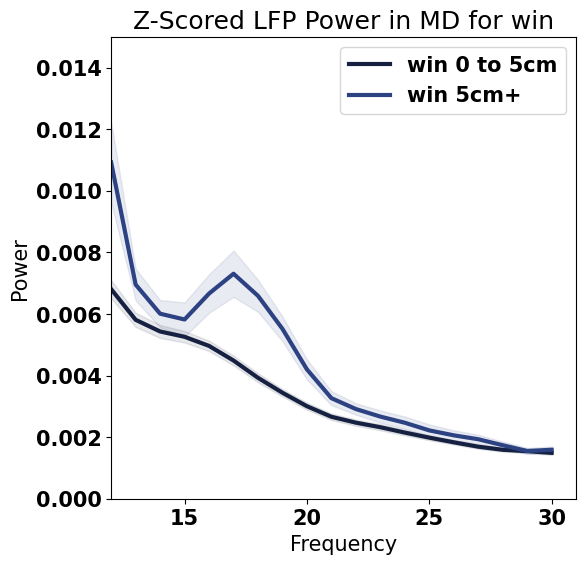

In [124]:
low_freq = 12
high_freq = 31
for region in grouped_all_trials_df["region_and_baseline_or_trial"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["region_and_baseline_or_trial"] == region]

    for outcome in region_df["trial_outcome"].unique():
        fig, ax = plt.subplots()
        plt.title("Z-Scored LFP Power in {} for {}".format(region.split("_")[0], outcome))
        plt.xlabel("Frequency")
        plt.ylabel("Power")
        plt.xlim(low_freq, high_freq) 
        # plt.yscale("log")
        plt.ylim(0, 0.015)
        
        outcome_df = region_df[(region_df["trial_outcome"] == outcome)]
        # Generate gradient colors
        gradient_colors = generate_gradient_colors(OUTCOME_TO_COLOR[outcome], 20)
        
        for index, row in outcome_df.iterrows():           
            current_frequencies = ALL_FREQUENCIES[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
                
            
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, BIN_TO_DISTANCE[row["distance_bin"]]), linewidth=3, color=gradient_colors[-(row["distance_bin"]+1) *4])
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=gradient_colors[-(row["distance_bin"]+1) *4])
            
            except Exception as e: 
                print(e)
                continue
        plt.legend()
        plt.savefig("./proc/distance_parsed_power/rce_distance_parsed_lfp_power_freq_{}_to_{}_region_{}_{}.png".format(low_freq, high_freq, region.split("_")[0], outcome))

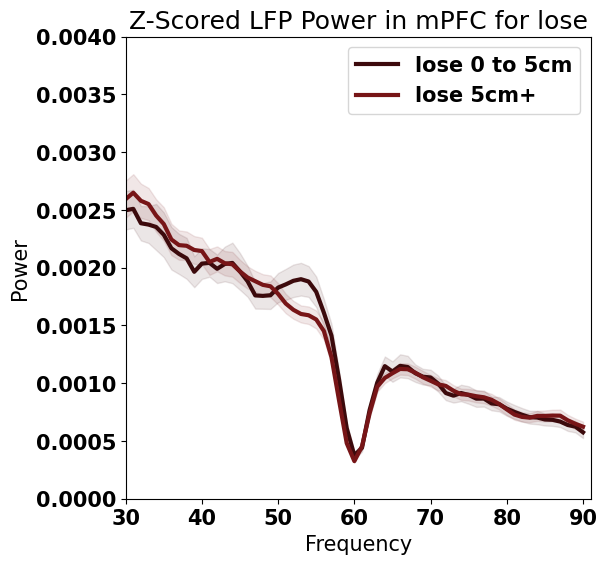

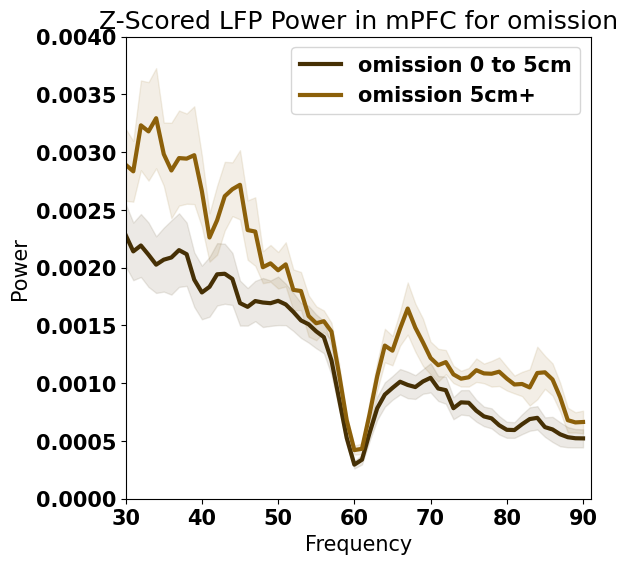

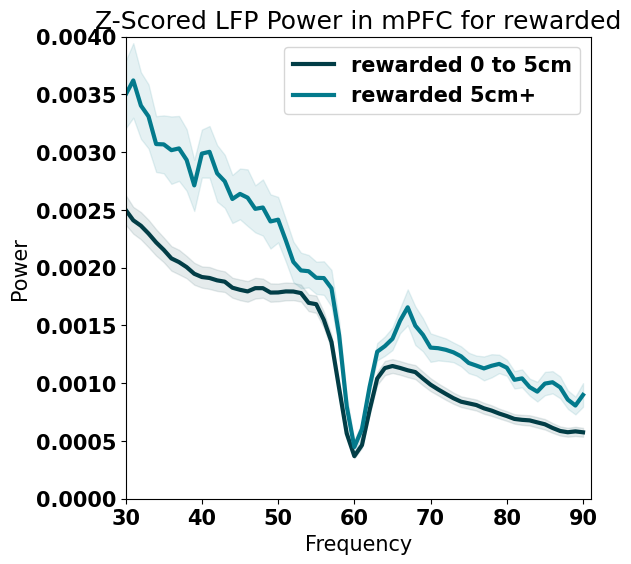

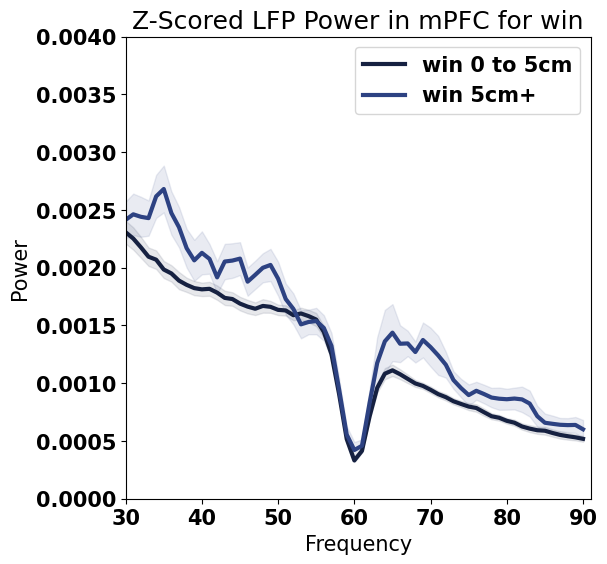

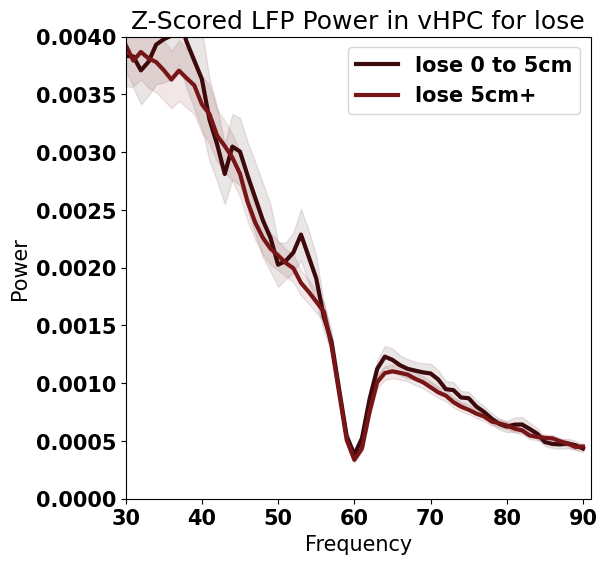

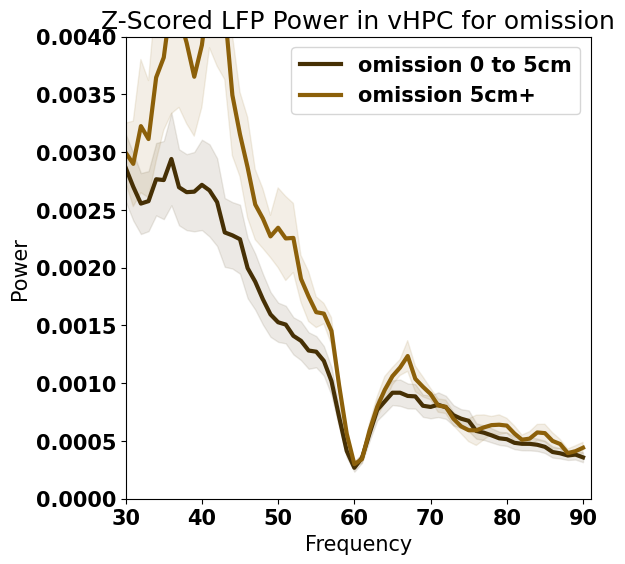

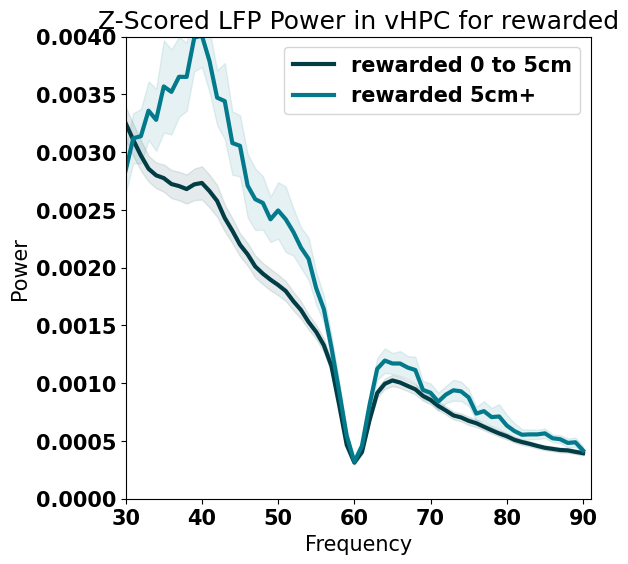

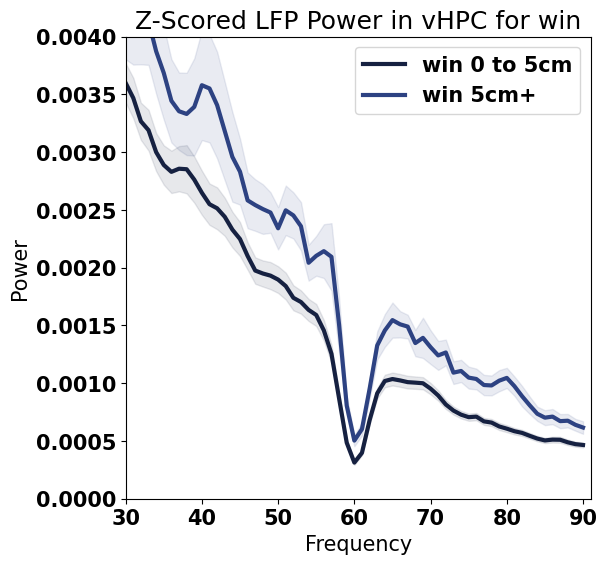

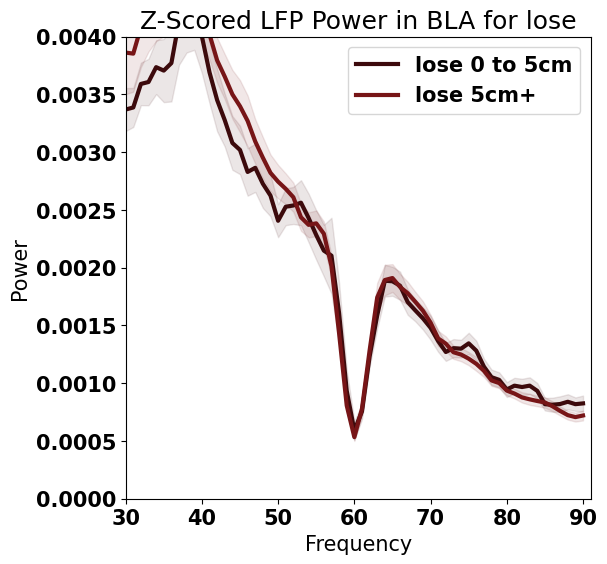

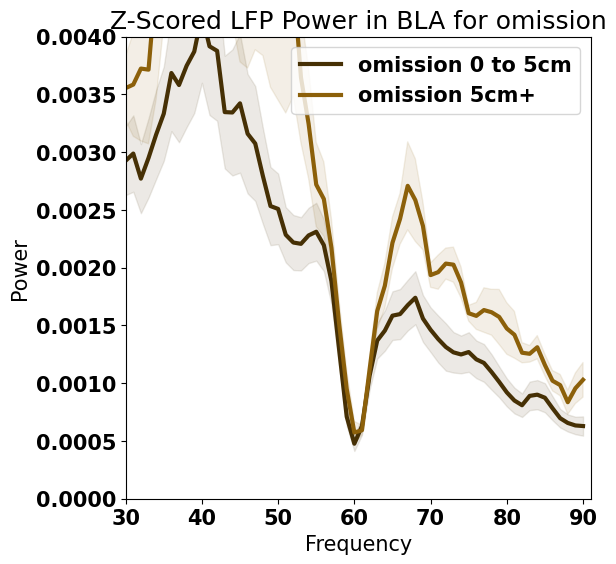

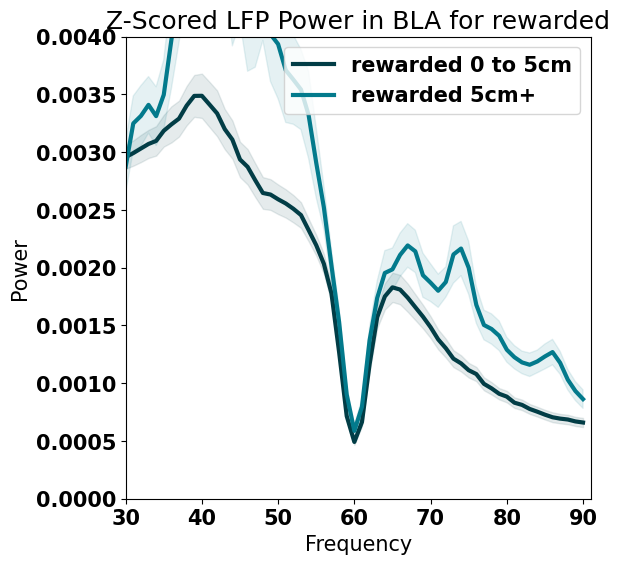

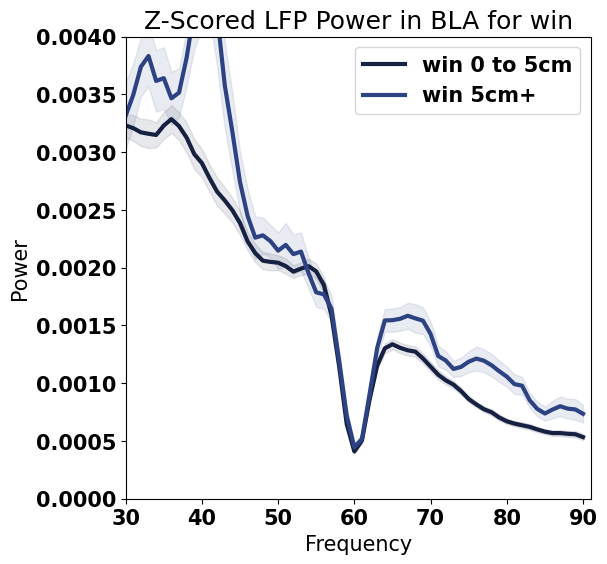

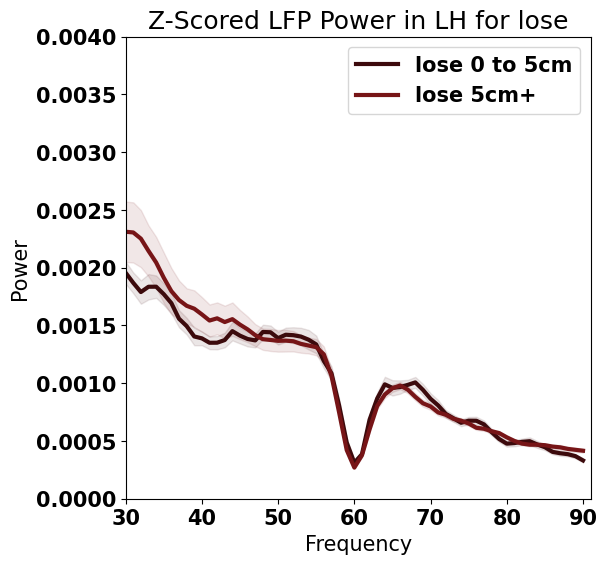

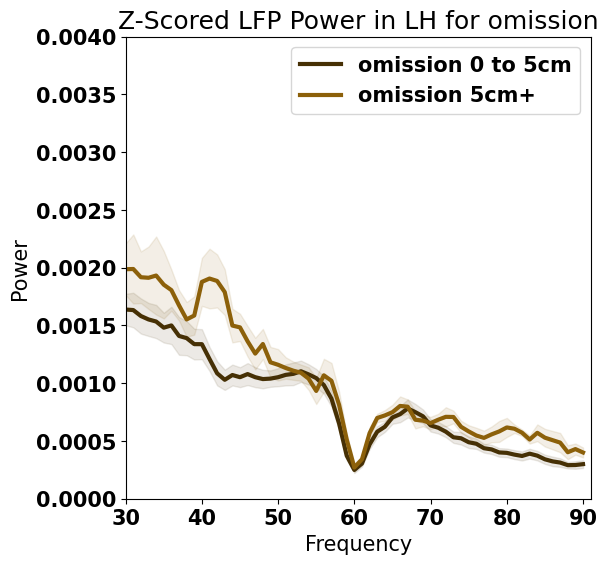

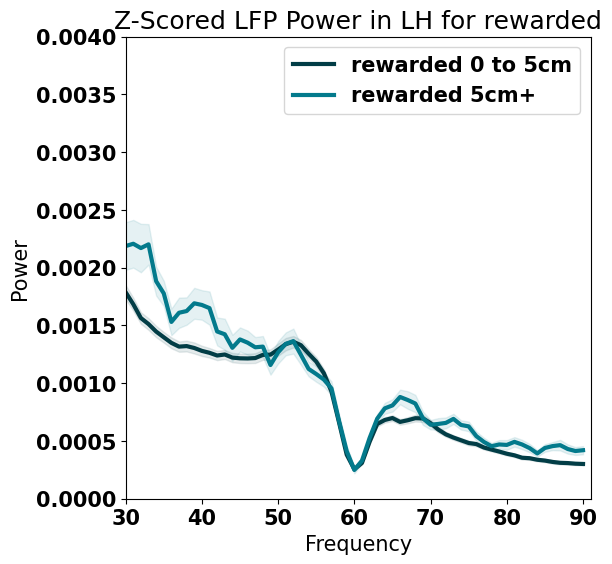

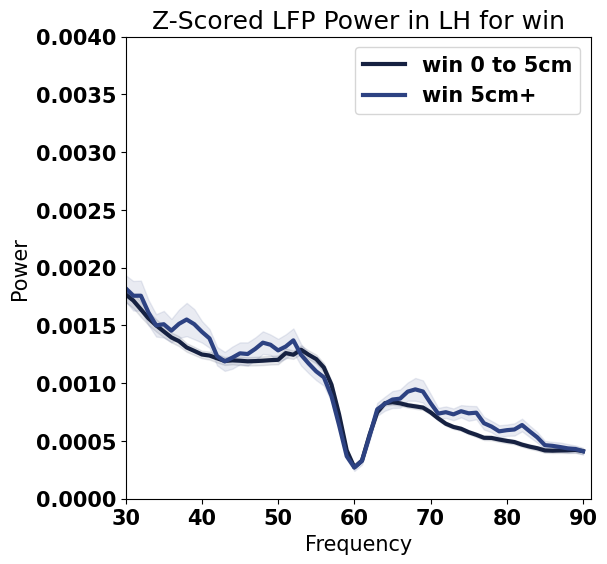

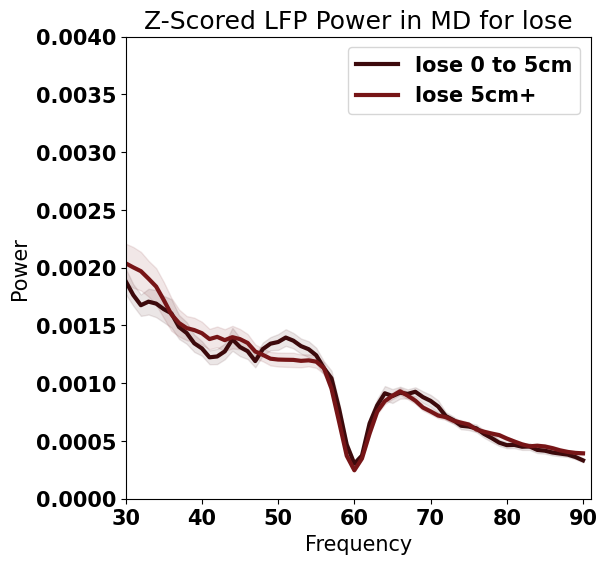

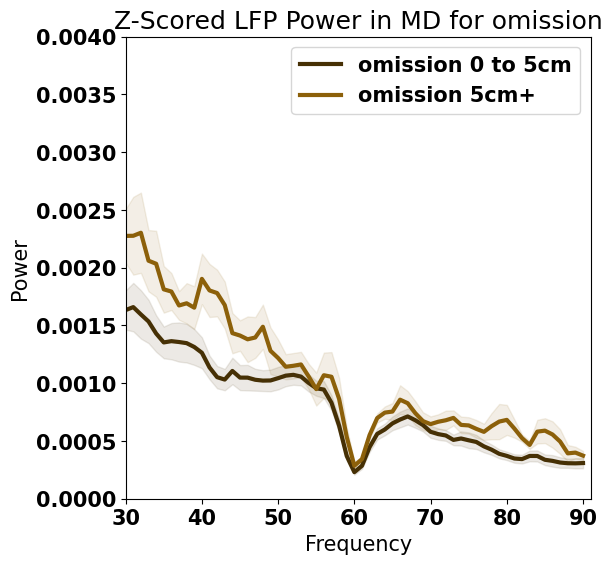

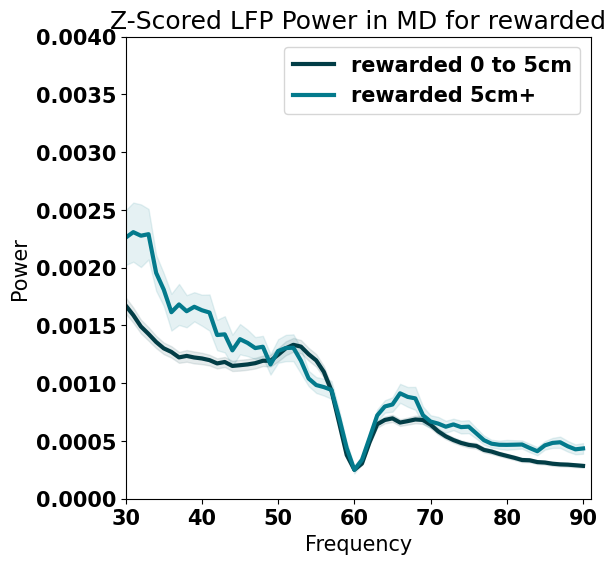

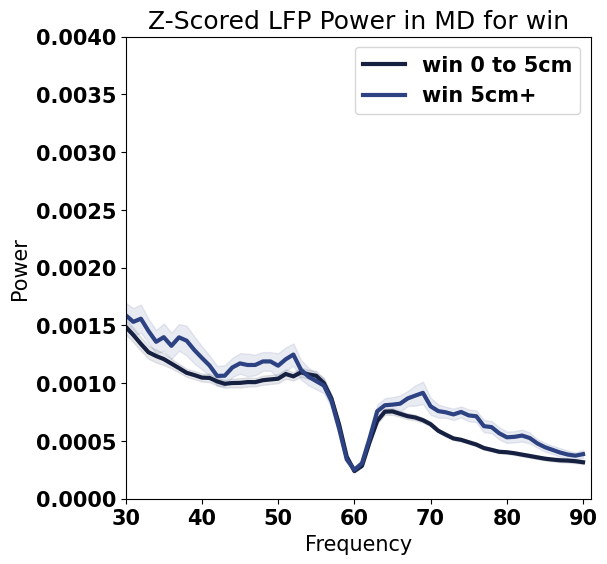

In [125]:
low_freq = 30
high_freq = 91
for region in grouped_all_trials_df["region_and_baseline_or_trial"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["region_and_baseline_or_trial"] == region]

    for outcome in region_df["trial_outcome"].unique():
        fig, ax = plt.subplots()
        plt.title("Z-Scored LFP Power in {} for {}".format(region.split("_")[0], outcome))
        plt.xlabel("Frequency")
        plt.ylabel("Power")
        plt.xlim(low_freq, high_freq) 
        # plt.yscale("log")
        plt.ylim(0, 0.004)
        outcome_df = region_df[(region_df["trial_outcome"] == outcome)]
        # Generate gradient colors
        gradient_colors = generate_gradient_colors(OUTCOME_TO_COLOR[outcome], 20)
        
        for index, row in outcome_df.iterrows():           
            current_frequencies = ALL_FREQUENCIES[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
                
            
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, BIN_TO_DISTANCE[row["distance_bin"]]), linewidth=3, color=gradient_colors[-(row["distance_bin"]+1) *4])
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=gradient_colors[-(row["distance_bin"]+1) *4])
            
            except Exception as e: 
                print(e)
                continue
        plt.legend()
        plt.savefig("./proc/distance_parsed_power/rce_distance_parsed_lfp_power_freq_{}_to_{}_region_{}_{}.png".format(low_freq, high_freq, region.split("_")[0], outcome))

# Plotting be distance

In [126]:
grouped_all_trials_df = DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.groupby(['distance_bin']).agg({k: lambda x: np.vstack([arr for arr in x.tolist() if not np.any(np.isnan(arr))]) for k in window_averaged_power_columns}).reset_index()

In [127]:
grouped_all_trials_df = pd.melt(grouped_all_trials_df, id_vars =['distance_bin'], value_vars =grouped_all_trials_df.drop(columns=["distance_bin"]).columns, value_name="power", var_name="region_and_baseline_or_trial") 

In [128]:
grouped_all_trials_df.head()

distance_bin                       region_and_baseline_or_trial  \
0             0  mPFC_baseline_distance_parsed_window_averaged_...   
1             1  mPFC_baseline_distance_parsed_window_averaged_...   
2             0  vHPC_baseline_distance_parsed_window_averaged_...   
3             1  vHPC_baseline_distance_parsed_window_averaged_...   
4             0  BLA_baseline_distance_parsed_window_averaged_p...   

                                               power  
0  [[0.012122069453978139, 0.011959119873308218, ...  
1  [[0.017215055958661626, 0.018720422669616613, ...  
2  [[0.010044701333274633, 0.008538127662706566, ...  
3  [[0.00456596263087271, 0.012518058930268468, 0...  
4  [[0.010480438905769425, 0.008776888177834377, ...

In [129]:
grouped_all_trials_df["brain_region"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [130]:
grouped_all_trials_df["trial_or_baseline"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [131]:
grouped_all_trials_df["mean_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanmean(np.vstack(x), axis=0))

In [132]:
grouped_all_trials_df["std_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanstd(np.vstack(x), axis=0))

In [133]:
grouped_all_trials_df["n_trials"] = grouped_all_trials_df["power"].apply(lambda x: np.sum(~np.isnan(x), axis=0))

In [134]:
grouped_all_trials_df["sem_power"] = grouped_all_trials_df.apply(lambda x: x["std_power"] / np.sqrt(x["n_trials"]), axis=1)

In [135]:
grouped_all_trials_df.head()

distance_bin                       region_and_baseline_or_trial  \
0             0  mPFC_baseline_distance_parsed_window_averaged_...   
1             1  mPFC_baseline_distance_parsed_window_averaged_...   
2             0  vHPC_baseline_distance_parsed_window_averaged_...   
3             1  vHPC_baseline_distance_parsed_window_averaged_...   
4             0  BLA_baseline_distance_parsed_window_averaged_p...   

                                               power brain_region  \
0  [[0.012122069453978139, 0.011959119873308218, ...         mPFC   
1  [[0.017215055958661626, 0.018720422669616613, ...         mPFC   
2  [[0.010044701333274633, 0.008538127662706566, ...         vHPC   
3  [[0.00456596263087271, 0.012518058930268468, 0...         vHPC   
4  [[0.010480438905769425, 0.008776888177834377, ...          BLA   

  trial_or_baseline                                         mean_power  \
0          baseline  [0.015345594235292947, 0.01822554281305404, 0....   
1          baseline  [0.023850499087890966, 0.02650209230281906, 0....   
2          baseline  [0.029571539623936532, 0.03155463781255715, 0....   
3          baseline  [0.037605547983969076, 0.03602387543133338, 0....   
4          baseline  [0.015597399424114498, 0.01754368728593749, 0....   

                                           std_power  \
0  [0.04428759877401081, 0.03605454499840627, 0.0...   
1  [0.13555532495439107, 0.1306178347266073, 0.13...   
2  [0.09656698203803925, 0.08886643949393876, 0.1...   
3  [0.10926573268344113, 0.08333518092548098, 0.0...   
4  [0.03143187372434689, 0.02737575276588556, 0.0...   

                                            n_trials  \
0  [230, 230, 230, 230, 230, 230, 230, 230, 230, ...   
1  [171, 171, 171, 171, 171, 171, 171, 171, 171, ...   
2  [230, 230, 230, 230, 230, 230, 230, 230, 230, ...   
3  [171, 171, 171, 171, 171, 171, 171, 171, 171, ...   
4  [230, 230, 230, 230, 230, 230, 230, 230, 230, ...   

                                           sem_power  
0  [0.0029202377845169926, 0.002377366294911883, ...  
1  [0.0103661747848247, 0.009988595470129452, 0.0...  
2  [0.006367438233064478, 0.00585967949425114, 0....  
3  [0.008355759416825424, 0.006372800563085086, 0...  
4  [0.002072556377607645, 0.0018051036818335646, ...

# Drawing all distance bins together for each trial outcome

In [136]:
OUTCOME_TO_COLOR

{'lose': '#951a1d',
 'omission': '#af780d',
 'rewarded': '#0499af',
 'win': '#3853a3'}

In [137]:
grouped_all_trials_df.head()

distance_bin                       region_and_baseline_or_trial  \
0             0  mPFC_baseline_distance_parsed_window_averaged_...   
1             1  mPFC_baseline_distance_parsed_window_averaged_...   
2             0  vHPC_baseline_distance_parsed_window_averaged_...   
3             1  vHPC_baseline_distance_parsed_window_averaged_...   
4             0  BLA_baseline_distance_parsed_window_averaged_p...   

                                               power brain_region  \
0  [[0.012122069453978139, 0.011959119873308218, ...         mPFC   
1  [[0.017215055958661626, 0.018720422669616613, ...         mPFC   
2  [[0.010044701333274633, 0.008538127662706566, ...         vHPC   
3  [[0.00456596263087271, 0.012518058930268468, 0...         vHPC   
4  [[0.010480438905769425, 0.008776888177834377, ...          BLA   

  trial_or_baseline                                         mean_power  \
0          baseline  [0.015345594235292947, 0.01822554281305404, 0....   
1          baseline  [0.023850499087890966, 0.02650209230281906, 0....   
2          baseline  [0.029571539623936532, 0.03155463781255715, 0....   
3          baseline  [0.037605547983969076, 0.03602387543133338, 0....   
4          baseline  [0.015597399424114498, 0.01754368728593749, 0....   

                                           std_power  \
0  [0.04428759877401081, 0.03605454499840627, 0.0...   
1  [0.13555532495439107, 0.1306178347266073, 0.13...   
2  [0.09656698203803925, 0.08886643949393876, 0.1...   
3  [0.10926573268344113, 0.08333518092548098, 0.0...   
4  [0.03143187372434689, 0.02737575276588556, 0.0...   

                                            n_trials  \
0  [230, 230, 230, 230, 230, 230, 230, 230, 230, ...   
1  [171, 171, 171, 171, 171, 171, 171, 171, 171, ...   
2  [230, 230, 230, 230, 230, 230, 230, 230, 230, ...   
3  [171, 171, 171, 171, 171, 171, 171, 171, 171, ...   
4  [230, 230, 230, 230, 230, 230, 230, 230, 230, ...   

                                           sem_power  
0  [0.0029202377845169926, 0.002377366294911883, ...  
1  [0.0103661747848247, 0.009988595470129452, 0.0...  
2  [0.006367438233064478, 0.00585967949425114, 0....  
3  [0.008355759416825424, 0.006372800563085086, 0...  
4  [0.002072556377607645, 0.0018051036818335646, ...

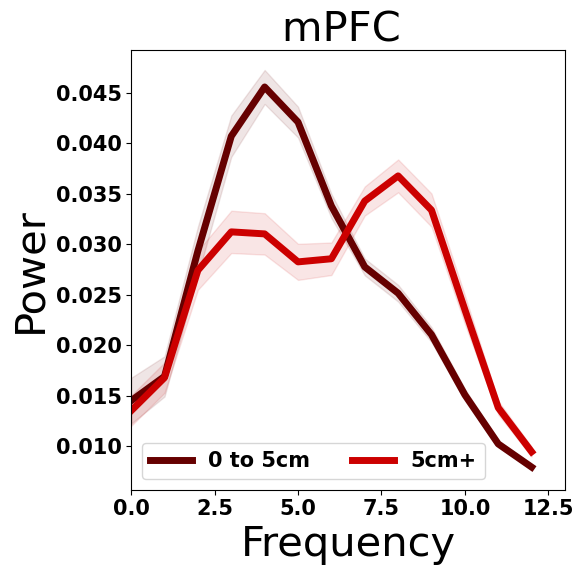

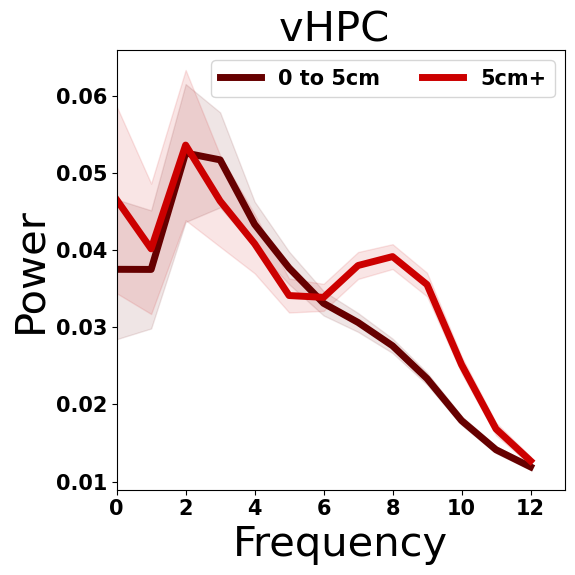

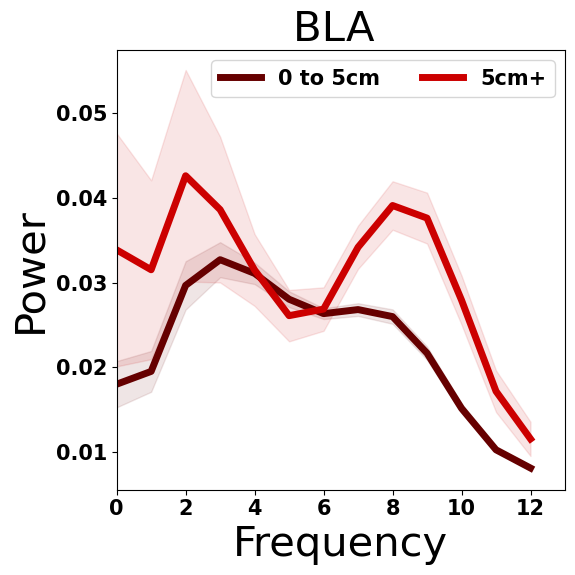

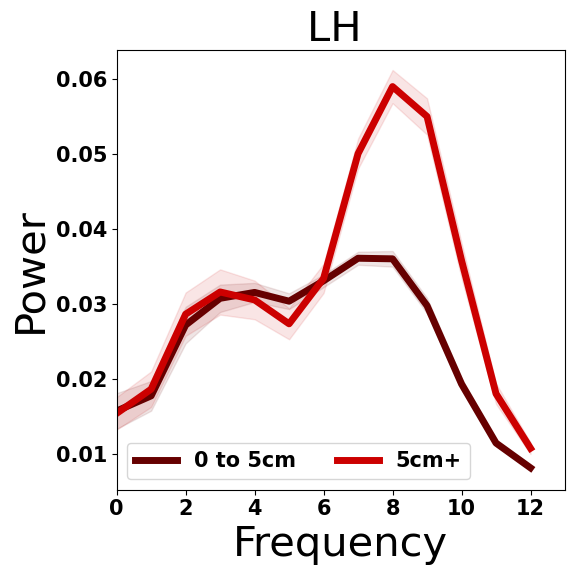

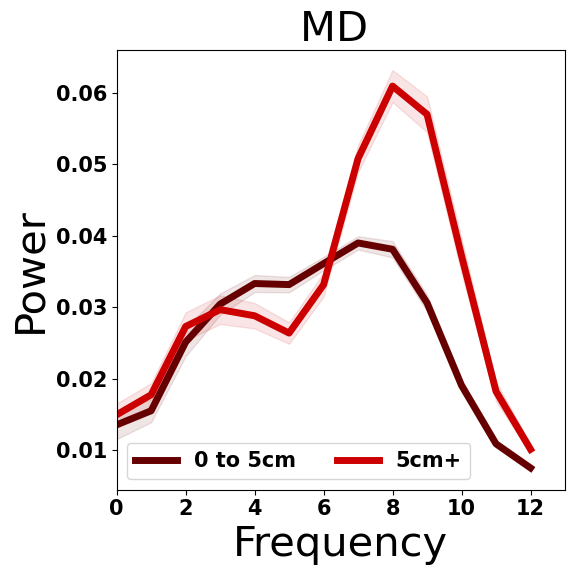

In [138]:
low_freq = 0
high_freq = 13
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[(grouped_all_trials_df["brain_region"] == region) & (grouped_all_trials_df["trial_or_baseline"] == "trial")]

    fig, ax = plt.subplots()
    plt.title("{} ".format(region.split("_")[0]), fontsize=30)
    plt.xlabel("Frequency", fontsize=30)
    plt.ylabel("Power", fontsize=30)
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    
    # Generate gradient colors
    gradient_colors = generate_gradient_colors("red", 20)
    
    for index, row in region_df.iterrows():           

        current_frequencies = ALL_FREQUENCIES[low_freq: high_freq]
        mean_power = row["mean_power"][low_freq: high_freq]
        sem_power = row["sem_power"][low_freq: high_freq]
            
        
        try:
            ax = sns.lineplot(x=current_frequencies, y=mean_power, \
            label="{}".format(BIN_TO_DISTANCE[row["distance_bin"]]), linewidth=5, color=gradient_colors[-(row["distance_bin"]+1) *4])
            
            plt.fill_between(current_frequencies, 
            mean_power - sem_power, mean_power + sem_power, \
            alpha=0.1, color=gradient_colors[-(row["distance_bin"]+1) *4])
        
        except Exception as e: 
            print(e)
            continue
    plt.tight_layout()
    plt.legend(ncol=2)
    plt.savefig("./proc/distance_parsed_power/rce_distance_parsed_lfp_power_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[0]))

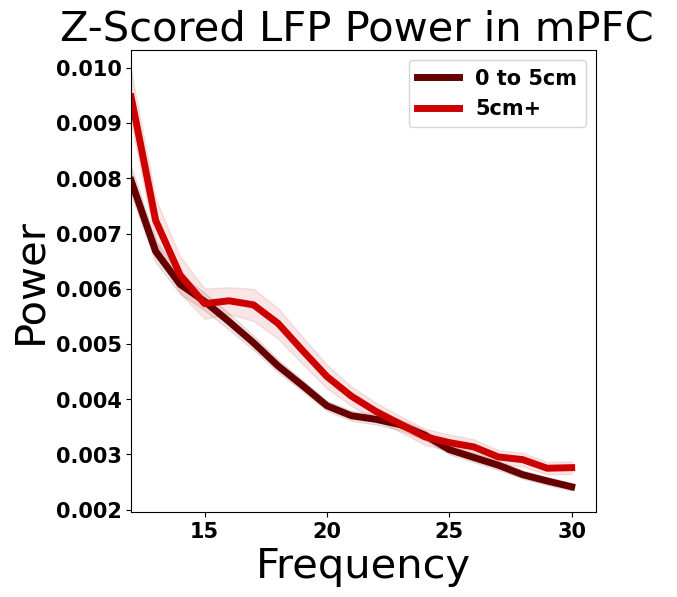

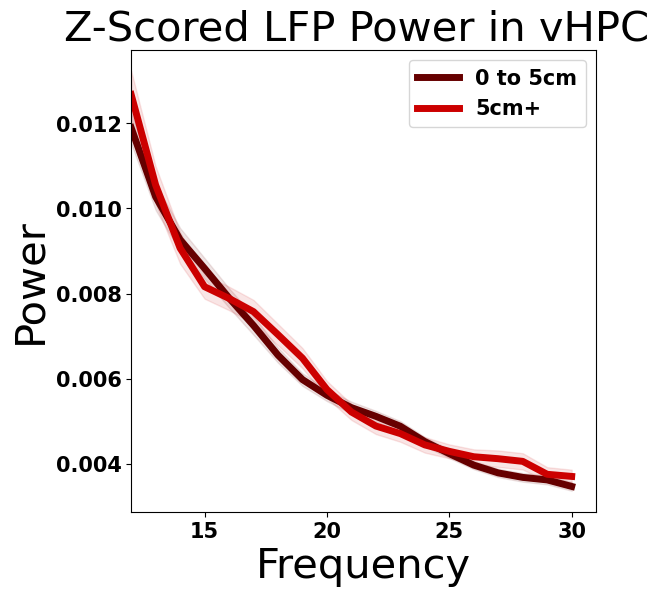

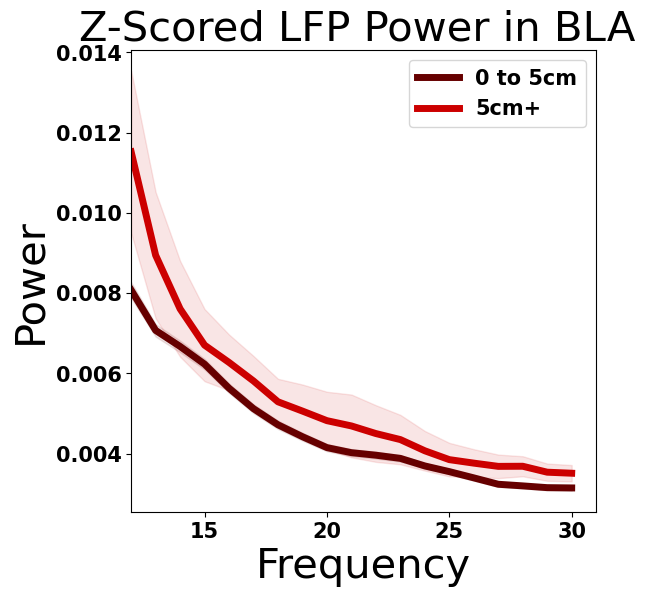

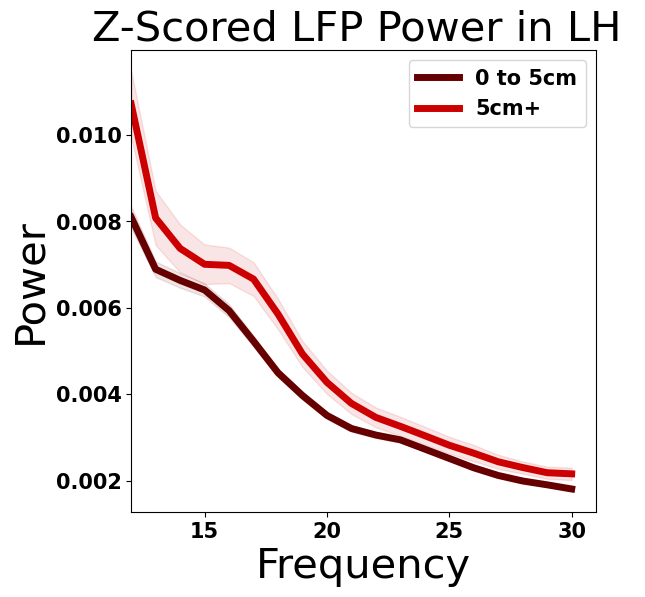

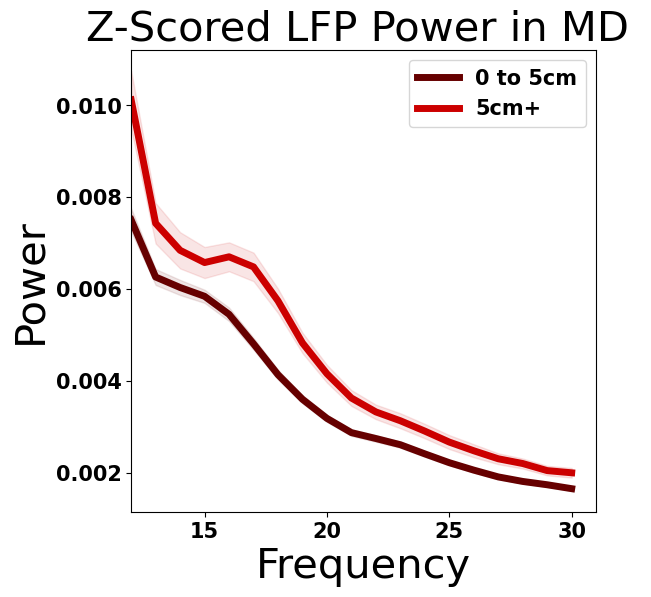

In [139]:
low_freq = 12
high_freq = 31
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[(grouped_all_trials_df["brain_region"] == region) & (grouped_all_trials_df["trial_or_baseline"] == "trial")]

    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} ".format(region.split("_")[0]), fontsize=30)
    plt.xlabel("Frequency", fontsize=30)
    plt.ylabel("Power", fontsize=30)
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    
    # Generate gradient colors
    gradient_colors = generate_gradient_colors("red", 20)
    
    for index, row in region_df.iterrows():           

        current_frequencies = ALL_FREQUENCIES[low_freq: high_freq]
        mean_power = row["mean_power"][low_freq: high_freq]
        sem_power = row["sem_power"][low_freq: high_freq]
            
        
        try:
            ax = sns.lineplot(x=current_frequencies, y=mean_power, \
            label="{}".format(BIN_TO_DISTANCE[row["distance_bin"]]), linewidth=5, color=gradient_colors[-(row["distance_bin"]+1) *4])
            
            plt.fill_between(current_frequencies, 
            mean_power - sem_power, mean_power + sem_power, \
            alpha=0.1, color=gradient_colors[-(row["distance_bin"]+1) *4])
        
        except Exception as e: 
            print(e)
            continue
    plt.legend()
    plt.savefig("./proc/distance_parsed_power/rce_distance_parsed_lfp_power_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[0]))

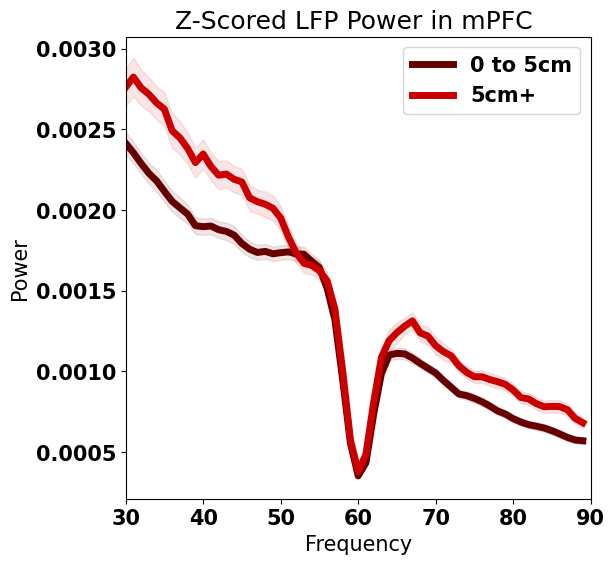

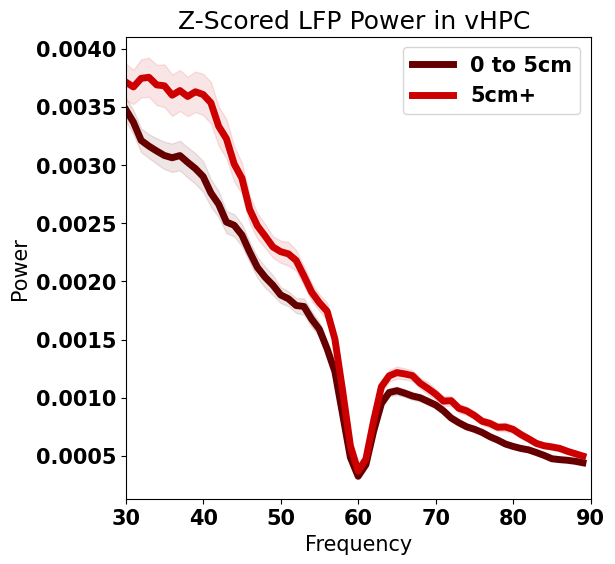

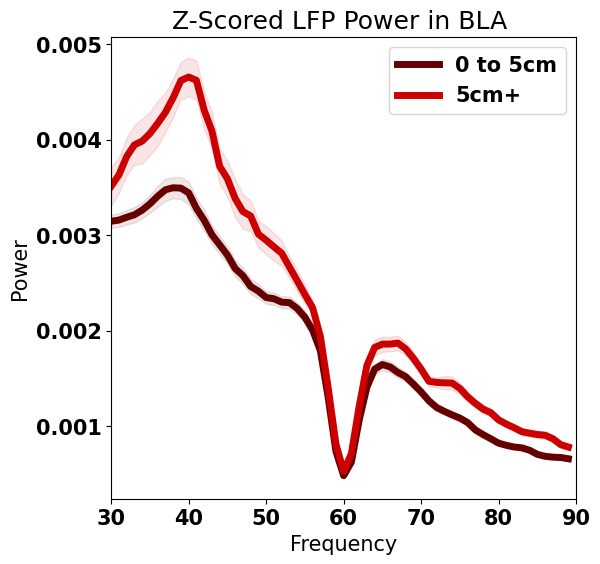

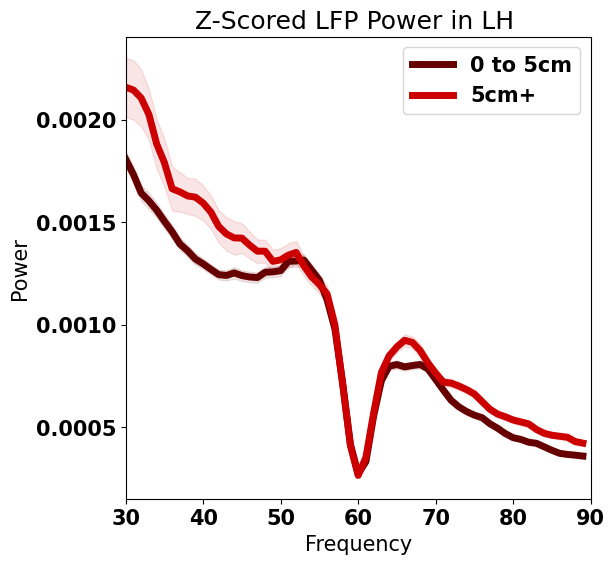

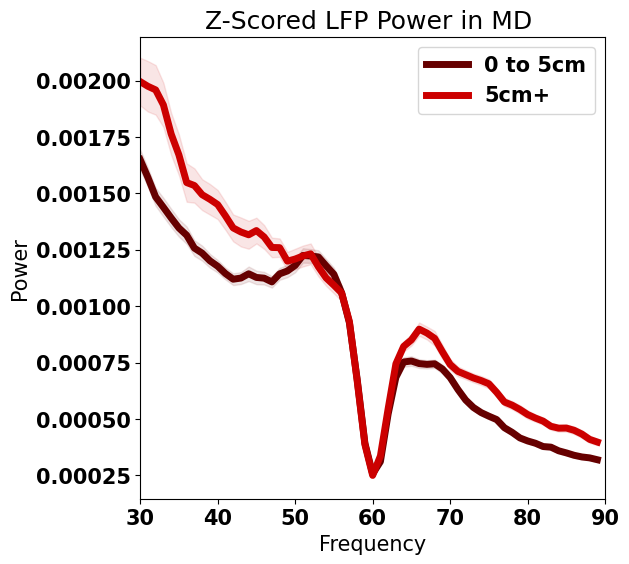

In [140]:
low_freq = 30
high_freq = 90
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[(grouped_all_trials_df["brain_region"] == region) & (grouped_all_trials_df["trial_or_baseline"] == "trial")]

    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} ".format(region.split("_")[0]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    
    # Generate gradient colors
    gradient_colors = generate_gradient_colors("red", 20)
    
    for index, row in region_df.iterrows():           

        current_frequencies = ALL_FREQUENCIES[low_freq: high_freq]
        mean_power = row["mean_power"][low_freq: high_freq]
        sem_power = row["sem_power"][low_freq: high_freq]
            
        
        try:
            ax = sns.lineplot(x=current_frequencies, y=mean_power, \
            label="{}".format(BIN_TO_DISTANCE[row["distance_bin"]]), linewidth=5, color=gradient_colors[-(row["distance_bin"]+1) *4])
            
            plt.fill_between(current_frequencies, 
            mean_power - sem_power, mean_power + sem_power, \
            alpha=0.1, color=gradient_colors[-(row["distance_bin"]+1) *4])
        
        except Exception as e: 
            print(e)
            continue
    plt.legend()
    plt.savefig("./proc/distance_parsed_power/rce_distance_parsed_lfp_power_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[0]))

In [141]:
# OLD CODE BELOW

# Parse power by lower distance

In [142]:
MERGED_LFP_AND_SLEAP.head()

time                                     recording_file  video_number  \
0  30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
1  32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
2  34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
3  35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
4  37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   

  current_subject                            mPFC_baseline_lfp_trace  \
0             6.1  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1             6.1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2             6.1  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3             6.1  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4             6.1  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                                mPFC_trial_lfp_trace  \
0  [0.50154364, 0.29617018, 0.22050627, 0.1145767...   
1  [0.31995025, 0.16429879, 0.010809131, 0.067016...   
2  [-0.13835686, 0.42804158, 0.5945022, 0.3134648...   
3  [-0.32211208, 0.023780087, 0.13835686, -0.1102...   
4  [-2.9508927, -2.998453, -2.3282866, -2.0104983...   

                     mPFC_baselineandtrial_lfp_trace  \
0  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                             vHPC_baseline_lfp_trace  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...   

                                vHPC_trial_lfp_trace  \
0  [-1.1479185, -1.1806493, -1.1432426, -1.139735...   
1  [-1.0205019, -0.9152954, -0.9947847, -0.976081...   
2  [0.47109076, 0.34016728, 0.18352668, 0.174175,...   
3  [0.15780956, 0.047927346, -0.14728892, -0.3565...   
4  [-4.0457697, -4.2304654, -3.9113393, -3.448431...   

                     vHPC_baselineandtrial_lfp_trace  ...  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...  ...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...  ...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...  ...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...  ...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...  ...   

                   vHPC_trial_gamma_all_window_power  \
0  [0.0020135659368561314, 0.0027292317420363845,...   
1  [0.0026469233388388058, 0.002786741949210294, ...   
2  [0.002100310636076798, 0.0013689602143719167, ...   
3  [0.0021455661138791568, 0.0015922017743831927,...   
4  [0.0013805169079942228, 0.0012943666022251314,...   

                    BLA_trial_theta_all_window_power  \
0  [0.009257916094824863, 0.012381398153461957, 0...   
1  [0.009522372369315574, 0.014633405349354162, 0...   
2  [0.01468855967631073, 0.01533697751247364, 0.0...   
3  [0.024091648332063394, 0.022704888879482264, 0...   
4  [0.02279104576428572, 0.01717199424140562, 0.0...   

                     BLA_trial_beta_all_window_power  \
0  [0.00427932933687006, 0.0035471877661874306, 0...   
1  [0.004449002119065537, 0.004048083472645959, 0...   
2  [0.0030555019077834742, 0.004015062265600589, ...   
3  [0.002741171523980557, 0.0023554679645659935, ...   
4  [0.003470137746906074, 0.0023129991129627616, ...   

                    BLA_trial_gamma_all_window_power  \
0  [0.0048310774595096495, 0.004187247842219092, ...   
1  [0.002579949083625546, 0.00350423590207247, 0....   
2  [0.002735393057006174, 0.004032022446035748, 0...   
3  [0.0024532923120036683, 0.0029159543592224297,...   
4  [0.003481575027399427, 0.0028723504767116706, ...   

                     LH_trial_

In [143]:

MERGED_LFP_AND_SLEAP["binned_trial_distance_mask"] = MERGED_LFP_AND_SLEAP["trial_chunked_subject_thorax_to_agent_distance"].apply(lambda x: [index for index, num in enumerate(x) if MIN_DISTANCE <= num <= MAX_DISTANCE])

MERGED_LFP_AND_SLEAP["binned_baseline_distance_mask"] = MERGED_LFP_AND_SLEAP["baseline_chunked_subject_thorax_to_reward_port_distance"].apply(lambda x: [index for index, num in enumerate(x) if MIN_DISTANCE <= num <= MAX_DISTANCE])

for col in baseline_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_distance_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_baseline_distance_mask"]]), axis=0), axis=1)

for col in trial_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_distance_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_trial_distance_mask"]]), axis=0), axis=1)



TypeError: 'float' object is not iterable

In [ ]:
for col in MERGED_LFP_AND_SLEAP.columns:
    print(col)

In [ ]:
DISTANCE_PARSED_MERGED_LFP_AND_SLEAP["trial_outcome"]

In [ ]:
grouped_all_trials_df = DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.groupby(['trial_outcome']).agg({k: lambda x: np.vstack([arr for arr in x.tolist() if not np.any(np.isnan(arr))]) for k in window_averaged_power_columns}).reset_index()

In [ ]:
grouped_all_trials_df = pd.melt(grouped_all_trials_df, id_vars =['trial_outcome'], value_vars =grouped_all_trials_df.drop(columns=["trial_outcome"]).columns, value_name="power", var_name="region_and_baseline_or_trial") 

In [ ]:
grouped_all_trials_df.head()

In [ ]:
grouped_all_trials_df["brain_region"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [ ]:
grouped_all_trials_df["trial_or_baseline"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [ ]:
grouped_all_trials_df["mean_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanmean(np.vstack(x), axis=0))

In [ ]:
grouped_all_trials_df["std_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanstd(np.vstack(x), axis=0))

In [ ]:
grouped_all_trials_df["n_trials"] = grouped_all_trials_df["power"].apply(lambda x: np.sum(~np.isnan(x), axis=0))

In [ ]:
grouped_all_trials_df["sem_power"] = grouped_all_trials_df.apply(lambda x: x["std_power"] / np.sqrt(x["n_trials"]), axis=1)

In [ ]:
grouped_all_trials_df

In [ ]:
OUTCOME_TO_COLOR

In [ ]:
FONTSIZE=20

In [ ]:
font = {'weight' : 'medium',
        'size'   : 15}

matplotlib.rc('font', **font)

In [ ]:
BAND_TO_FREQ

In [ ]:
BAND_TO_FREQ_PLOT = {'theta': (6, 10), 'beta': (20, 30), 'gamma': (30, 50)}
BAND_TO_FREQ_COLOR = {'theta': "red", 'beta': "blue", 'gamma': "green"}

BAND_TO_FREQ_PLOT = {'theta': (6, 10), 'gamma': (30, 50)}
BAND_TO_FREQ_COLOR = {'theta': "red", 'gamma': "green"}

In [ ]:
low_freq = 0
high_freq = 51
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[(grouped_all_trials_df["brain_region"] == region) & (grouped_all_trials_df["trial_or_baseline"] == "trial")]

    fig, ax = plt.subplots()
    plt.title("Power Spectra {} ".format(region.split("_")[0]), fontsize=FONTSIZE)
    plt.xlabel("Frequency (Hz)", fontsize=FONTSIZE)
    plt.ylabel("Power (a.u.)", fontsize=FONTSIZE)
    plt.xlim(low_freq, high_freq) 
    plt.yscale("log")
        
    for index, row in region_df.iterrows():           

        current_frequencies = ALL_FREQUENCIES[low_freq: high_freq]
        mean_power = row["mean_power"][low_freq: high_freq]
        sem_power = row["sem_power"][low_freq: high_freq]
            
        
        try:
            ax = sns.lineplot(x=current_frequencies, y=mean_power, \
            label="{}".format(row["trial_outcome"]), linewidth=5, color=OUTCOME_TO_COLOR[row["trial_outcome"]])
            
            plt.fill_between(current_frequencies, 
            mean_power - sem_power, mean_power + sem_power, \
            alpha=0.1, color=OUTCOME_TO_COLOR[row["trial_outcome"]])
        
        except Exception as e: 
            print(e)
            continue
    for band, (min_freq, max_freq) in BAND_TO_FREQ_PLOT.items():
        ax.axvspan(min_freq, max_freq, facecolor=BAND_TO_FREQ_COLOR[band], alpha=0.1, label=band)
    plt.legend(fontsize=15, ncol=2)


    plt.tight_layout()
    plt.savefig("./proc/distance_parsed_power/rce_distance_parsed_lfp_power_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[0]))
    plt.savefig("./proc/distance_parsed_power/rce_distance_parsed_lfp_power_freq_{}_to_{}_region_{}.eps".format(low_freq, high_freq, region.split("_")[0]))

# Exporting Velocity Parsed dataframe for plotting

In [ ]:
EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP = DISTANCE_PARSED_MERGED_LFP_AND_SLEAP[DISTANCE_PARSED_MERGED_LFP_AND_SLEAP["distance_bin"] == 0].copy()

In [ ]:
EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP = EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.drop(columns=[col for col in EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.columns if "baseline" in col], errors="ignore")

In [ ]:
EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP = EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.drop(columns=[col for col in EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.columns if "trace" in col], errors="ignore")

In [ ]:
EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP = pd.melt(EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP, id_vars=EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.columns[:19], value_vars=[col for col in EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.columns if "distance_parsed_window_averaged_power" in col], value_name="power", var_name="region_and_baseline_or_trial")




In [ ]:
EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP["brain_region"] = EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP["region_and_baseline_or_trial"].apply(lambda x:x.split("_")[0])
EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP["trial_or_baseline"] = EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP["region_and_baseline_or_trial"].apply(lambda x:x.split("_")[1])

In [ ]:
EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP = EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.dropna(subset=["power"])

In [ ]:
for band, (min_freq, max_freq) in BAND_TO_FREQ.items():
    EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP["mean_{}_power".format(band)] = EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP["power"].apply(lambda x: np.nanmean(x[min_freq:max_freq]))

In [ ]:
EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.to_pickle("./proc/rce_distance_parsed_power_spectra_region_and_baselinetrial_rows.pkl")

In [ ]:
EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP

In [ ]:
for col in EXPORTED_DISTANCE_PARSED_MERGED_LFP_AND_SLEAP.columns[:19]:
    print(col)

# Calculating the distance parsed average power for each frequency band

In [ ]:
BAND_TO_FREQ

In [ ]:
distance_parsed_window_averaged_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "distance_parsed_window_averaged_power" in col]

In [ ]:
distance_parsed_window_averaged_power_columns

- Removing all trials that have a high distance trhoguhout

In [ ]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["binned_trial_distance_mask"].map(len) >= 1]

In [ ]:
for col in distance_parsed_window_averaged_power_columns:
    region_base_name = "_".join(col.split("_")[:2])
    print(region_base_name)
    for band, (min_freq, max_freq) in BAND_TO_FREQ.items():
        print(band)
        MERGED_LFP_AND_SLEAP["{}_{}_all_power".format(region_base_name, band)] = MERGED_LFP_AND_SLEAP[col].apply(lambda x: x[min_freq:max_freq])
        MERGED_LFP_AND_SLEAP["{}_{}_mean_power".format(region_base_name, band)] = MERGED_LFP_AND_SLEAP["{}_{}_all_power".format(region_base_name, band)].apply(lambda x: x.mean())

In [ ]:
# MD_trial_mean_gamma_power
mean_power_col = [col for col in MERGED_LFP_AND_SLEAP.columns if "mean_power" in col]

In [ ]:
mean_power_df = pd.DataFrame(MERGED_LFP_AND_SLEAP.groupby(['trial_outcome'])[mean_power_col].mean()).reset_index()

In [ ]:
mean_power_df["color"] = mean_power_df["trial_outcome"].map(OUTCOME_TO_COLOR)

In [ ]:
sem_power_df = pd.DataFrame(MERGED_LFP_AND_SLEAP.groupby(['trial_outcome'])[mean_power_col].sem()).reset_index()

In [ ]:
mean_power_df

In [ ]:
OUTCOME_COMPARISONS

In [ ]:
rank_sum_dict = []
for col in mean_power_col:
    region = col.split("_")[0]
    baseline_or_trial = col.split("_")[1]
    band = col.split("_")[2]
    if baseline_or_trial != "trial":
        continue
    for key, (first_outcome, second_outcome) in  OUTCOME_COMPARISONS.items():
        first_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"] == first_outcome]
        second_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"] == second_outcome]
        statistic, p_value = mannwhitneyu(first_df[col], second_df[col], alternative='two-sided')
        rank_sum_dict.append({"region": region, "band": band, "comparison": key, "mannwhitneyu_statistic": statistic, "mannwhitneyu_pvalue": p_value, "all_outcomes": set([first_outcome, second_outcome])})
rank_sum_df = pd.DataFrame(rank_sum_dict)

In [ ]:
rank_sum_df.head()

In [ ]:
current_df

In [ ]:
round(mean_power_df[[col for col in mean_power_df.columns if "theta" in col]].to_numpy().max() * 1.25, 3)

In [ ]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.copy()
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "multitaper" in col], errors="ignore").copy()
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "connectivity" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "frequencies" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "spike_interface" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "distance_parsed_window_averaged_power" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "all_window_power" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "all_power" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP if "window_averaged_power" in col], errors="ignore")

